# Aprendizaje Automático - Práctica 1 - Experimentación con clasificadores y regresores

#### Valoración máxima: 10 puntos

#### Fecha límite de entrega: 14 de Abril de 2024 a las 23:59

#### Entrega a través de https://pradogrado2324.ugr.es/

### Nombre completo: <mark>Álvaro Rodríguez Gallardo</mark>



---


**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero `.ipynb`) o, en su defecto, tres Notebooks de Colab (uno con cada ejercicio). No es necesario entregar ninguna memoria externa (por ejemplo, en `.pdf`).

- El código debe estar bien comentado (explicando lo que realizan los distintos apartados y/o bloques), y todas las decisiones tomadas y el trabajo desarrollado (incluyendo los conceptos fundamentales subyacentes) deben documentarse ampliamente en celdas de texto. Es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también tanto una descripción de las principales funciones (Python/scikit-learn) empleadas (para mostrar que el alumno comprende, a nivel técnico, lo que está haciendo), como una valoración razonada sobre la calidad de los resultados obtenidos. Sin esta documentación, se considera que el trabajo NO ha sido presentado.

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final.  

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El código NO puede escribir nada a disco.

- El path de lectura desde Google Drive debe ser siempre el mismo, que es el que se indica en este Notebook.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores. Es decir, un ejercicio con errores de ejecución tendrá una calificación de 0.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input()`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- Se entrega solamente este Notebook, y no los datos empleados.


---

## <font color='blue'>Ejercicio 1: EL PROBLEMA DEL SOBREAJUSTE (2 puntos)</font>

<font color='blue'>Aprendizaje Automático (AA) es la rama de la Inteligencia Artificial (IA) que se ocupa de diseñar e implementar máquinas que sean capaces de aprender a realizar una determinada tarea a partir de los propios datos (es decir, sin necesidad de ser programadas explícitamente para ello). El principal objetivo de los modelos de AA es realizar predicciones/estimaciones más allá de los conjuntos de datos con los que fueron entrenados y, como es lógico, se pretende que dichos modelos sean capaces de $generalizar$ más allá de los ejemplos vistos en entrenamiento. Como consecuencia, uno de los mayores obstáculos a los que nos enfrentamos se conoce como $sobreajuste$ ($overfitting$): el hecho de que nuestros pesos/parámetros estén demasiado apegados a nuestros ejemplos de entrenamiento, y se produzca una brecha a nivel de generalización (en donde los resultados en entrenamiento serían manifiestamente mejores que en test).

<font color='blue'>En este ejercicio intentaremos profundizar un poco en lo que es el sobreajuste, así como las causas y consecuencias del mismo.



---




<font color='blue'>Primero, importamos las librerías necesarias y fijamos la semilla aleatoria para que nuestros resultados sean reproducibles entre ejecuciones.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fijamos la semilla aleatoria
np.random.seed(42) #¿Por qué 42? https://en.wikipedia.org/wiki/Phrases_from_The_Hitchhiker%27s_Guide_to_the_Galaxy

In [2]:
import sklearn
if sklearn.__version__ < '1.3':
  # Actualizamos scikit-learn para tener la última versión.
  # Nos interesa de cara a disponer de las más recientes funcionalidades
  # (como, por ejemplo, poder usar cross_validate() empleando el parámetros return_indices=True; https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)
  !pip install scikit-learn --upgrade
else:
  print('La versión de scikit-learn es: ', sklearn.__version__)


La versión de scikit-learn es:  1.4.2






---






### <font color='blue'>Ejercicio 1.A: Regresión en 1D (1 punto)</font>

<font color='blue'> En este ejercicio se intentará aproximar una función continua unidimensional por medio de regresión lineal (`LinearRegression()`), y se irá, progresivamente, incrementando la complejidad del modelo empleando características polinomiales (`PolynomialFeatures()`), de grados $\{1, 2, 4, 8, 16, 32\}$. La función real a aproximar (nuestra $\textit{ground truth}$) es: $f(x) = cos(1.5\cdot\pi\cdot x) + sin(0.5\cdot\pi\cdot x)$.

<font color='blue'> Las tareas a realizar en este ejercicio se resumen a continuación:
1.   Completamos el código de la función real a aproximar.
2.   Generamos las entradas ($X$): 20 puntos aleatorios en el intervalo $[0,1]$.
3.   Generamos las salidas deseadas ($y$): el valor resultante de emplear la función real y sumarle un cierto error aleatorio (`np.random.randn`: distribución Normal estándar), que pretende simular el ruido que pueden contener las etiquetas ($labels$/$targets$) en cualquier problema.
4.   Generamos las características polinomiales asociadas con los grados proporcionados, y creamos un $pipeline$ (usando `Pipeline` o `make_pipeline`) con dichas características y regresión lineal.
5.   Realizamos el ajuste (`fit`) de dicho `pipeline` con $X$ e $y$, y empleamos `cross_val_score`, o `cross_validate`, para evaluar el rendimiento utilizando $\textit{10-fold cross-validation}$ y el error cuadrático medio ($MSE$) como métrica de error.
6. Mostramos figuras con ajustes. Para ello, generamos 1000 valores equiespaciados en el intervalo $[0,1]$, y realizamos la predicción de nuestro modelo (`pipeline.predict`) sobre dichos datos para mostrar, en rojo, la función que aproxima nuestro modelo entrenado. En la misma figura incluiremos, en azul, la función real empleada para generar los datos, y los puntos/muestras generadas ($X$ e $y$). El título de cada figura debe incluir el grado del polinomio.
7. Junto con estas figuras, se debe mostrar una tabla (y aquí la librería `tabulate` puede ser de utilidad) que incluya, el grado del polinomio en la primera fila ($header$ de la tabla), el número de pesos/coeficientes en la segunda, el $MSE$ (promedio y desviación típica) obtenido en entrenamiento en validación cruzada en la tercera fila, el $MSE$ (promedio y desviación típica) obtenido en test en validación cruzada en la cuarta fila, y el valor medio de los coeficientes aprendidos en valor absoluto con cada uno de los 6 modelos ajustados (incluyendo el $bias$ o $intercept$) en la última.

<font color='blue'> El alumnado debe describir en detalle el trabajo realizado y las conclusiones extraídas: ¿se observa algún patrón en los resultados obtenidos, así como en la magnitud de los coeficientes tras el entrenamiento? ¿Se observa algún fenómeno de infraentrenamiento ($underfitting$) o sobreentrenamiento ($overfitting$)? ¿Qué grado considera el más adecuado para resolver este problema? ¿Por qué?

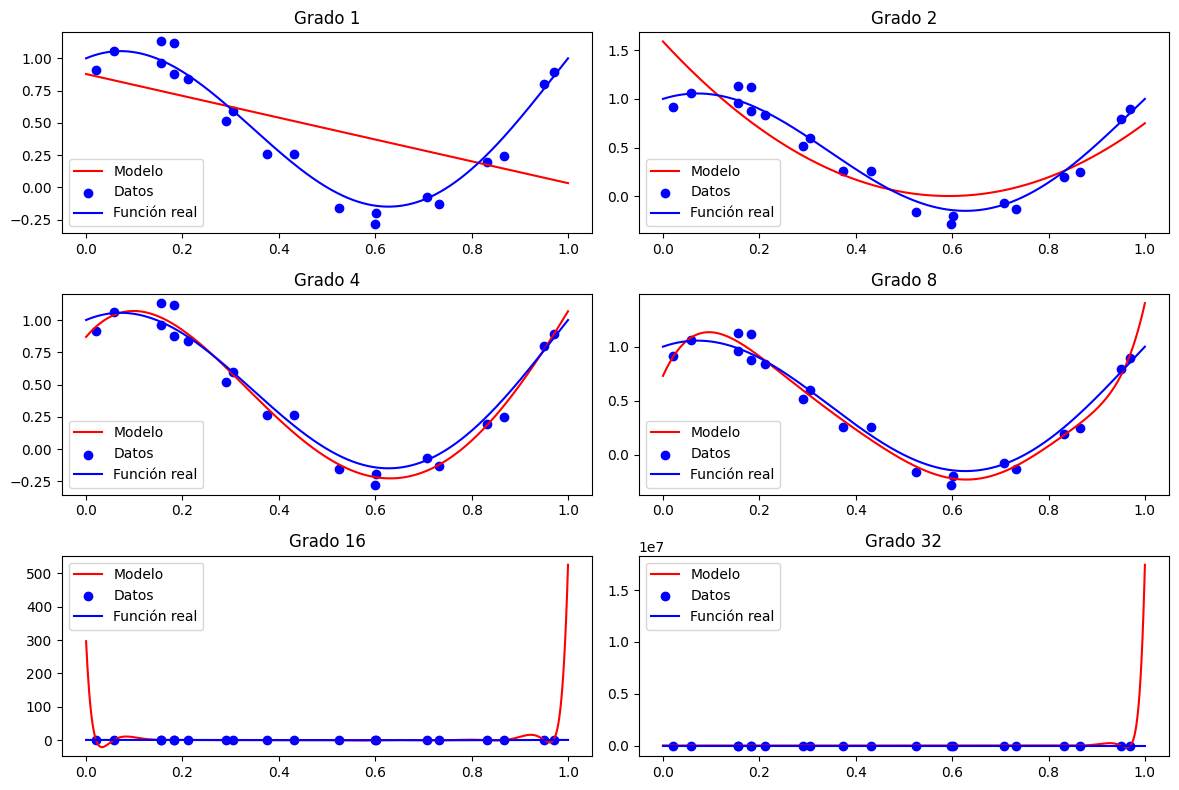

+--------------------------------+-----------+------------+-------------+-------------+-------------+-------------+
|        Grado polinomio         |     1     |     2      |      4      |      8      |     16      |     32      |
+================================+===========+============+=============+=============+=============+=============+
|      Número coeficientes       |     3     |     4      |      6      |     10      |     18      |     34      |
+--------------------------------+-----------+------------+-------------+-------------+-------------+-------------+
|    Media MSE entrenamiento     | 0.158315  | 0.0512122  | 0.00544511  | 0.00450932  | 0.000880213 | 0.000273102 |
+--------------------------------+-----------+------------+-------------+-------------+-------------+-------------+
| Desv. típica MSE entrenamiento | 0.0159274 | 0.00773051 | 0.000629772 | 0.000558909 | 0.000110749 | 0.00040562  |
+--------------------------------+-----------+------------+-------------

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import PolynomialFeatures
np.random.seed(42)
def funcionReal(X):
    return np.cos(1.5*np.pi*X) + np.sin(0.5*np.pi*X)

n_samples = 20
degrees = [1, 2, 4, 8, 16, 32]

X = np.random.rand(n_samples)
y = funcionReal(X) + np.random.randn(n_samples) * 0.1

# Para el test generamos 1000 valores equiespaciados en el intervalo [0, 1]
X_test = np.linspace(0, 1, 1000).reshape(-1, 1)

# Diccionario para almacenar los scores para cada grado
#scores_dict = {}

plt.figure(figsize=(12, 8))

i=1

# Para la tabla, se deberá ir calculando lo estadísticos correspondientes
resultados = [["Grado polinomio"],["Número coeficientes"],["Media MSE entrenamiento"],["Desv. típica MSE entrenamiento"],["Media MSE test"],["Desv. típica MSE test"],["Media coeficientes"]]

# Se crea el pipeline para los grados, se ajusta, y se evalua rendimiento
for deg in degrees:
  pipeline = make_pipeline(PolynomialFeatures(deg),LinearRegression())
  pipeline.fit(X[:,np.newaxis],y) # Espera 2D, hay que poner X[:np.newaxis] para que lo reciba bien

  # Evaluación con cross-validation a 10
  #scores = cross_val_score(pipeline,X[:,np.newaxis],y,scoring='neg_mean_squared_error',cv=10)
  scores = cross_validate(pipeline,X[:,np.newaxis],y,scoring='neg_mean_squared_error',cv=10,return_train_score=True,return_estimator=True)
  # Almacenar la evaluación como negativa
  #scores_dict[deg] = -scores
  train_mse_media = -scores['train_score'].mean()
  train_mse_desv_tip = scores['train_score'].std()
  test_mse_media = -scores['test_score'].mean()
  test_mse_desv_tip = scores['test_score'].std()

  # Hacemos la predicción según el pipeline creado
  Y_test = pipeline.predict(X_test)

  n_coefs = len(scores['estimator'][0].named_steps['linearregression'].coef_) + 1   #+1 para incluir el bias
  #coef_media = np.mean(np.abs(pipeline.named_steps['linearregression'].coef_))
  # Se quiere la media de los coeficientes con el bias, ello en valor absoluto. Se busca la media de las medias para cada modelo en el CV
  mean_coefs_per_model=[]
  for est in scores['estimator']:
    mean_coefs_per_model.append(np.mean(np.append(
        np.abs(est.named_steps['linearregression'].coef_[1:]),
        np.abs(est.named_steps['linearregression'].intercept_)
    )))

  coef_media = np.mean(mean_coefs_per_model)
  # Almacenamos resultados para la tabla resumen
  #resultados.append([deg,n_coefs,train_mse_media,train_mse_desv_tip,test_mse_media,test_mse_desv_tip,coef_media])
  resultados[0].append(deg)
  resultados[1].append(n_coefs)
  resultados[2].append(train_mse_media)
  resultados[3].append(train_mse_desv_tip)
  resultados[4].append(test_mse_media)
  resultados[5].append(test_mse_desv_tip)
  resultados[6].append(coef_media)

  # Se construye la gráfica para el grado en cuestión
  plt.subplot(len(degrees) // 2,2,i)
  plt.tight_layout()
  plt.plot(X_test,Y_test,color='red',label='Modelo')
  plt.scatter(X,y,facecolor='blue',edgecolor='b',label='Datos')
  plt.plot(X_test,funcionReal(X_test),color='blue',label='Función real')
  plt.title(f'Grado {deg}')
  plt.legend()
  i = i+1

plt.show()
import tabulate as tabulate
print(tabulate.tabulate(resultados,headers='firstrow',tablefmt='grid',stralign='center',numalign='center'))


En primer lugar, se resolverá el problema de aproximar la función $\cos (1.5 \pi x)+\sin(0.5 \pi x)$, que se llamará *ground truth*. Para ello, se generan 20 muestras aleatorias, evaluadas en la función y se añade ruido. Con esto, se busca realizar una obtención de polinomios de varios grados para un problema de regresión, intentando obtener el grado que mejor resuelva el problema.

Los pasos a seguir para la realización del código han sido los siguientes:

- Se usan los conjuntos $train = \{(x_i,y_i): i \in \{1,...,20\}\}$ y $test = \{z_i : i \in \{1,...,20\}\}$ para el entrenamiento y test.

- Con apoyo de *scikit-learn* se construye cada polinomio según el grado con ``fit``, transformando necesariamente $X$ en matriz 2D, que es lo que espera ``fit``.

- Tras entrenar el modelo, se usará validación cruzada para partir en 10 subconjuntos a $train$. Esta técnica dividirá el conjunto de entrenamiento en 10 subconjuntos, separando uno para test y los otros 9 para entrenar, rotando hasta que cada subconjunto haya sido usado para test.

- Se usa el error cuadrático medio como métrica. En *scikit-learn* se implementa *neg_mean_squared_error*, devolviendo la media como negativa (no la desviación) por la convención de "mayor es mejor". Para su interpretación, se transforma a positivo.

- Es obtenidos el número de coeficientes del modelo (grado del polinomio más uno por el bias) y se añade, junto al resto de estadísticos, a una lista para su posterior visualización.

- Se dibujan las gráficas correspondientes al polinomio obtenido, junto a la nube de puntos correspondiente y la función real.

Con respecto a los resultados, si solo se visualizan las gráficas, se observa que el polinomio de grado 4 ofrece un buen ajuste, junto al de grado 8. Analizando la tabla de resultados, aunque el polinomio de grado 32 presenta un ajuste excelente en entrenamiento, el alto error y variabilidad en el test sugieren un sobreajuste. Esto también es aplicable al de grado 16. Por el contrario, los polinomios de grado 1 y 2 presentan más error en el entrenamiento que los de grado 4 y 8, y viendo las gráficas se observa que en realidad están realizando infraentrenamiento. Entonces, los polinomios que mejor parecen ajustarse al problema son los de grado 4 y 8.

En general, la diferencia entre elegir el polinomio de grado 4 o el de grado 8 va a suponer un error bastante pequeño. Si acaso, por ser ligeramente menor el error del polinomio de grado 8, se elegiría este, aunque va a suponer un coste computacional algo más elevado que el de grado 4. Además, aunque los estadísticos en test sean menores en el de grado 4, no se recomienda hacer la elección en función de estos, pues se podría estar cometiendo *data snooping*.

Como conclusión, si el coste computacional no es importante, se escogería el polinomio de grado 8. En otro caso, sería el de grado 4 el elegido. Sin embargo, es necesario remarcar que no supondría una diferencia muy grande la elección. Otra de las conclusiones obtenidas sería que la elección del grado no es trivial: si no es muy grande, se produce infraentrenamiento y si es muy grande se produce sobreajuste a los datos de entrenamiento, haciendo que el modelo generalice mal en ambos casos.

Por último, se observa que la media de los coeficientes (incluido el bias) aumenta conforme más grande es, en general el grado (pues la media para el grado 16 es mayor que el del grado 32). Ello lleva a pensar que los coeficientes tienden a tener un valor elevado cuanto más se sobreajusta el modelo. Por le contrario, en los polinomios en los que hay infraentrenamiento, la media tiende a ser baja.

### <font color='blue'>Ejercicio 1.B: Clasificación en 2D (1 punto)</font>

<font color='blue'> En este ejercicio haremos algo similar a lo realizado en el anterior, pero ahora con un problema de clasificación y empleando un problema sintético en 2D. Haremos uso de dos funciones, que se incluyen a continuación:

<font color='blue'>$simula\_unif(N, dim, rango)$, que calcula una lista de $N$ vectores de dimensión $dim$. Cada vector contiene $dim$ números aleatorios uniformes en el intervalo $rango$.

<font color='blue'>$simula\_recta(intervalo)$, que simula de forma aleatoria los parámetros $v = (a, b)$ de una
recta, $y = ax + b$, dado un determinado intervalo (dentro del cual se generan dos puntos aleatorios, que se emplearán para calcular la pendiente y el término independiente de la recta).

In [4]:
def simula_unif(N, dim, rango):
	return np.random.uniform(rango[0],rango[1],(N,dim))

In [5]:
def simula_recta(intervalo):
    points = np.random.uniform(intervalo[0], intervalo[1], size=(2, 2))
    x1 = points[0,0]
    x2 = points[1,0]
    y1 = points[0,1]
    y2 = points[1,1]
    # y = a*x + b
    a = (y2-y1)/(x2-x1) # Cálculo de la pendiente.
    b = y1 - a*x1       # Cálculo del termino independiente.

    return a, b


<font color='blue'>Ahora, con ayuda de la función $simula\_unif()$, vamos a generar una muestra de 100 puntos 2D, en el intervalo $[-50, 50]$,  a los que vamos a añadir una etiqueta usando el signo de la función $f(x, y) = y - ax - b$ (es decir, el signo de la distancia de cada punto a la recta simulada con
$simula\_recta()$).




In [6]:
"""
np.sign(0) da 0 (véase https://numpy.org/doc/stable/reference/generated/numpy.sign.html), lo que, en ciertas ocasiones, puede ser problemático
Por ese motivo, proporcionamos esta sencilla función que devuelve el signo del valor que se le proporciona como entrada
Si esta función se emplea con un array, se obtendrá el error "ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()"
Si quiere emplearse con arrays, bastaría vectorizarla:
		numeros = np.random.randint(-10,10,10)
		sgn = np.vectorize(signo)
		print(numeros)
		print(sgn(numeros))
"""
def signo(x):
	if x >= 0:
		return 1
	return -1

def f(x, y, a, b):
	return signo(y - a*x - b)

In [7]:
intervalo = [-50,50]
[a, b] = simula_recta(intervalo)
new_points = simula_unif(100, 2, [-50,50])

y = []
for i in range(0,new_points.shape[0]):
    y.append(f(new_points[i][0], new_points[i][1], a, b))

y = np.array(y, np.float64)

<font color='blue'>A continuación, calculamos el error de clasificación de dicha recta ideal, y visualizamos el ajuste obtenido. Como es lógico, el error es 0% dado que lo único que estamos haciendo es mostrar los puntos etiquedatos con la recta que acabamos de crear.

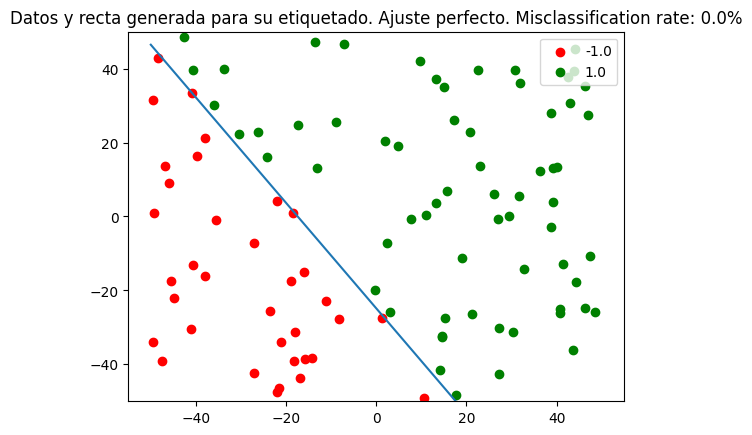

In [8]:
errors = []
for i in range(0,new_points.shape[0]):
    errors.append(f(new_points[i,0], new_points[i,1], a, b) != y[i])
MC_rate = 100*np.sum(errors)/new_points.shape[0]

# Dibujamos una gráfica donde los puntos muestren el resultado de su etiqueta, junto con la recta usada para ello
clases = np.unique(y)
X_class = [new_points[y==c_i] for c_i in clases]
colors=['red','green']
for i in range(len(clases)):
    plt.scatter(X_class[i][:, 0], X_class[i][:, 1], color=colors[i], label = clases[i])

# plt.scatter(new_points[:,0],new_points[:,1], c=y)
plt.legend(loc='upper right')
plt.plot([intervalo[0], intervalo[1]], [a*(intervalo[0])+b, a*(intervalo[1])+b])
plt.ylim((intervalo[0], intervalo[1]))
plt.title('Datos y recta generada para su etiquetado. Ajuste perfecto. Misclassification rate: {}%'.format(MC_rate))
plt.show()

<font color='blue'>Vamos a modificar de forma aleatoria un 5\% de las etiquetas positivas y otro 5\% de las negativas. Esta modificación de etiquetas está asociada con el ruido que siempre puede estar presenta en las etiquetas (sea por problemas en la transmisión de los datos, la precisión de los sistemas de medición, la incertidumbre ligada al proceso de adquisición y anotación de los datos, etc.) En esta ocasión, a pesar de que la recta empleada es la recta ideal (es decir, la propia función empleada para generar nuestra muestra original), habrá un cierto porcentaje de error asociado.  </font>

In [9]:
def introducir_ruido(y,porcent_ruido):
  # Identificamos las clases a partir de las etiquetas
  classes = np.unique(y)
  # Creamos una copia de las etiquetas, que será el array ruidoso que produciremos como salida
  y_noise = y.copy()
  # Ahora vamos recorriendo cada una de las clases
  for i in range(len(classes)):
    # Calculamos el número de ejemplos por clase a modificar
    numberPerClass = int(np.round(np.sum(y==classes[i])*porcent_ruido/100))
    # Recuperamos los índices de los ejemplos de cada clase y los desordenamos
    clase = np.where(y == classes[i])
    clase = np.random.permutation(clase[0])
    # Alteramos (introducimos ruido en) los índices correspondientes
    for i in clase[:numberPerClass]:
      y_noise[i] = y[i]*-1

  return y_noise

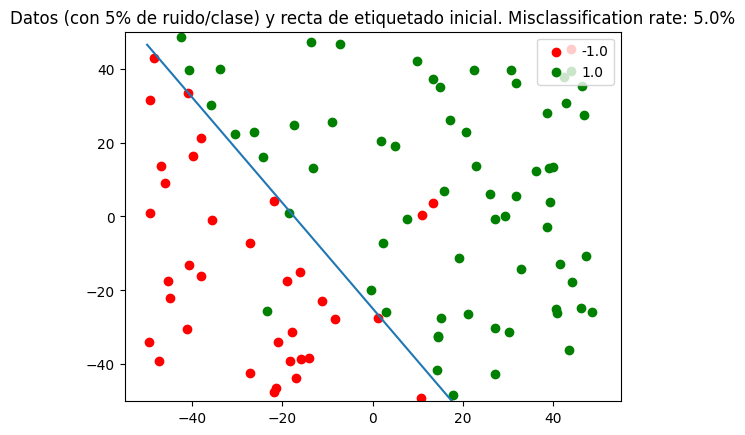

In [10]:
# Dibujar una gráfica donde los puntos muestren el resultado de su etiqueta,
# junto con la recta usada para ello
# Array con 10% de indices aleatorios para introducir ruido

porcentaje_ruido = 5
y_noise = introducir_ruido(y,porcentaje_ruido)

errors = []
for i in range(0,new_points.shape[0]):
    errors.append(f(new_points[i,0], new_points[i,1], a, b) != y_noise[i])
MC_rate = 100*np.sum(errors)/new_points.shape[0]

plt.figure()

clases = np.unique(y_noise)
X_class = [new_points[y_noise==c_i] for c_i in clases]
colors=['red','green']
for i in range(len(clases)):
    plt.scatter(X_class[i][:, 0], X_class[i][:, 1], color=colors[i], label = clases[i])

plt.legend(loc='upper right')
# plt.scatter(new_points[:,0],new_points[:,1], c=y_noise)
plt.plot([intervalo[0], intervalo[1]], [a*(intervalo[0])+b, a*(intervalo[1])+b])
plt.ylim((intervalo[0], intervalo[1]))
plt.title('Datos (con {}% de ruido/clase) y recta de etiquetado inicial. Misclassification rate: {}%'.format(porcentaje_ruido,MC_rate))
plt.show()



<font color='blue'>Ahora queremos entrenar un $\textit{Support Vector Machine}$
 (`sklearn.svm.SVC` con kernel lineal) con estos datos y mostrar $accuracy$ y $f1$-$score$, tanto en entrenamiento como test, así como las fronteras de decisión encontradas. Una frontera de decisión ($\textit{decision boundary}$) es la superficie/hiperplano que separa el espacio de entradas de modo que, en el contexto de un problema de clasificación binaria como el que nos ocupa, el clasificador etiquete todos los puntos de un lado de la frontera como pertenecientes a una clase y todos los del otro lado como pertenecientes a la otra.

 <font color='blue'>Vamos a repetir la operación anterior con distintas transformaciones (polinómicas) de los datos de entrada (grados $1, 2, 4$ y $8$). Queremos explorar cómo cambian estas fronteras de decisión a medida que incrementamos la complejidad de los modelos empleados.

 <font color='blue'> Más concretamente, tenemos que mostrar los siguientes resultados:
* <font color='blue'>Fronteras de decisión 2D sobre datos de entrenamiento para cada uno de los 4 ajustes (e incluyendo una línea que represente la frontera ideal, es decir, la correspondiente con la recta generadora de las etiquetas y que nos gustaría aproximar). Para esta visualización pueden resultar de utilidad las siguientes funciones: `contourf`, `ListedColormap` o `DecisionBoundaryDisplay`; y el siguiente script: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html.
* <font color='blue'>Una tabla que incluya el grado de polinomio empleado (en la primera fila), el número de pesos ajustados (en la segunda fila), y los errores de entrenamiento y test con cada uno de los modelos ajustados ($accuracy$ y $f1$-$score$), en las filas tercera y cuarta de la tabla, respectivamente. De cara a evaluar el error de test, en este caso crearemos un conjunto de test diferenciado (con 100 ejemplos) siguiendo exactamente el mismo proceso empleado para el conjunto de entrenamiento. Este error de test se utilizará como estimación del error fuera de la muestra (lo que se conoce como $\textit{out-of-sample error}$).

<font color='blue'>Desde el punto de vista de entrenamiento del modelo, se recomienda emplear $SVC$ atendiendo a los siguientes aspectos: es importante escalar los datos antes de entrenar (`StandardScaler`); no nos interesa emplear regularización a la hora de entrenar el modelo (¿por qué?), motivo por el cual tendremos que escoger un valor elevado para el hiperparámetro $C$; tendremos que escoger un valor de iteraciones suficientemente alto como para permitir que el modelo entrene adecuadamente, pero suficientemente bajo como para que el entrenamiento no se eternice; y, finalmente, recordemos que el kernel a emplear es linear (¿cuál emplea SVC por defecto?).

<font color='blue'>El alumnado debe describir en detalle el trabajo realizado, las decisiones tomadas, así como las conclusiones extraídas a partir de los resultados obtenidos.

Primero se importan las librerías necesarias

In [11]:
# a cubrir por el alumnado
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

Para hacer el código de resolución más legible, se define la siguiente función para dibujar los resultados

In [12]:
def plot_decision_boundaries(X,y,model,degree,ax,a,b):
  # Definición de rangos
  x0,x1 = X[:,0].min()-1,X[:,0].max()+1
  y0,y1 = X[:,1].min()-1,X[:,1].max()+1
  xx,yy = np.meshgrid(np.linspace(x0,x1,100),np.linspace(y0,y1,100))

  # Predicciones correspondientes para el dibujo
  Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
  Z = Z.reshape(xx.shape)

  # Selección de colores
  cmap = ListedColormap(['#FFAAAA','#AAAAFF'])

  # Se dibujan contornos y puntos
  ax.contourf(xx,yy,Z,cmap=cmap,alpha=0.5)
  scatter = ax.scatter(X[:,0],X[:,1],c=y,cmap=cmap,edgecolor='k')
  ax.set_xlim(xx.min(),xx.max())
  ax.set_ylim(yy.min(),yy.max())
  ax.set_title(f"Grado {degree}")

  # Se dibuja la recta ideal
  xs = np.array([x0,x1])
  ys = a * xs + b
  ax.plot(xs,ys,'k--',label='Recta ideal')
  ax.legend()

A continuación se resuelve el problema, experimentando con varios grados de los polinomios que se usarán para la clasificación

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Matriz de Confusión - Entrenamiento para grado 1:
[[27  9]
 [ 3 61]]
Matriz de Confusión - Test para grado 1:
[[27  6]
 [ 5 62]]
Matriz de Confusión - Entrenamiento para grado 2:
[[31  5]
 [ 2 62]]
Matriz de Confusión - Test para grado 2:
[[30  3]
 [ 2 65]]
Matriz de Confusión - Entrenamiento para grado 4:
[[33  3]
 [ 1 63]]
Matriz de Confusión - Test para grado 4:
[[27  6]
 [11 56]]
Matriz de Confusión - Entrenamiento para grado 8:
[[36  0]
 [ 0 64]]
Matriz de Confusión - Test para grado 8:
[[25  8]
 [ 9 58]]


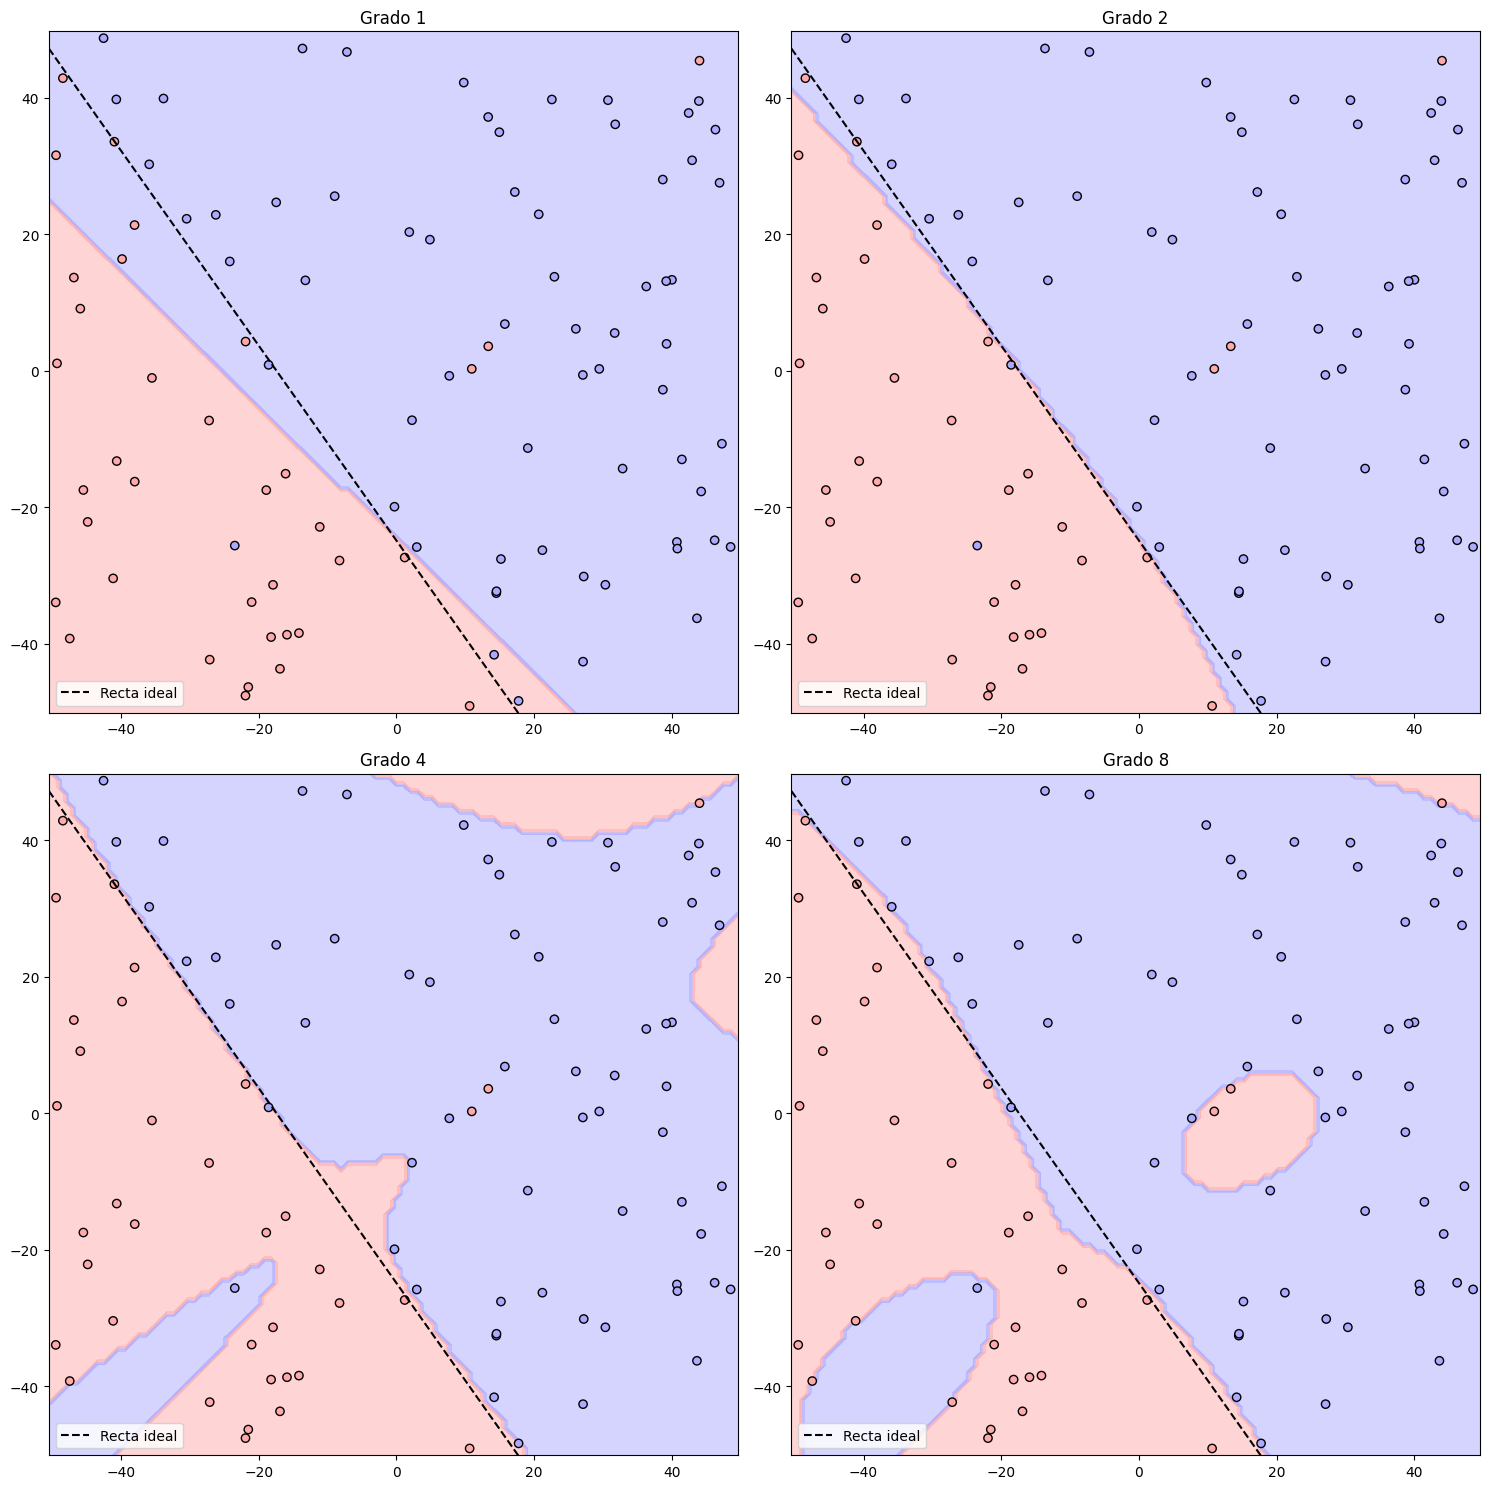

+-----------------+----------+----------+----------+---------+
|      Grado      |    1     |    2     |    4     |    8    |
+=================+==========+==========+==========+=========+
| Número de pesos |    3     |    6     |    15    |   45    |
+-----------------+----------+----------+----------+---------+
| Train Accuracy  |   0.88   |   0.93   |   0.96   |    1    |
+-----------------+----------+----------+----------+---------+
|  Test Accuracy  |   0.89   |   0.95   |   0.83   |  0.83   |
+-----------------+----------+----------+----------+---------+
|    Train F1     | 0.910448 | 0.946565 | 0.969231 |    1    |
+-----------------+----------+----------+----------+---------+
|     Test F1     | 0.918519 | 0.962963 | 0.868217 | 0.87218 |
+-----------------+----------+----------+----------+---------+


In [13]:
degrees = [1, 2, 4, 8]

# Ajusta el número de subplots para coincidir con el número de modelos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))  # Ajustado a 3x2 para 6 modelos
axes = axes.flatten()

# Preparación de train y test
#X_train = simula_unif(100,2,intervalo)
#a_train,b_train = simula_recta(intervalo)
a_train,b_train=a,b
#y_train=[]
X_train = new_points

#for j in range(len(X_train)):
#  y_train.append(f(X_train[j,0],X_train[j,1],a_train,b_train))

#y_train = np.array(y_train,np.float64)
#y_train = introducir_ruido(y_train,porcentaje_ruido)
y_train = y_noise

X_test = simula_unif(100,2,intervalo) # Generación de otros puntos para test
a_test,b_test = simula_recta(intervalo)
y_test=[]

for j in range(len(X_test)):
  y_test.append(f(X_test[j,0],X_test[j,1],a_train,b_train))

y_test = np.array(y_test,np.float64)
y_test = introducir_ruido(y_test,porcentaje_ruido)

results = [["Grado"],["Número de pesos"],["Train Accuracy"],["Test Accuracy"],["Train F1"],["Test F1"]]
i = 0

for degree,ax in zip(degrees,axes):
    model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree)),
        ("scaler", StandardScaler()),
        ("svm", SVC(kernel="linear", C=1e3, max_iter=10000))
    ])

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)

    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Matrices de confusión
    conf_matrix_train = confusion_matrix(y_train, y_train_pred)
    print(f"Matriz de Confusión - Entrenamiento para grado {degree}:")
    print(conf_matrix_train)

    conf_matrix_test = confusion_matrix(y_test,y_test_pred)
    print(f"Matriz de Confusión - Test para grado {degree}:")
    print(conf_matrix_test)

   # results.append((degree, model.named_steps['svm'].coef_.size, train_acc, test_acc, train_f1, test_f1))
    results[0].append(degree)
    results[1].append(model.named_steps['svm'].coef_.size)
    results[2].append(train_acc)
    results[3].append(test_acc)
    results[4].append(train_f1)
    results[5].append(test_f1)

    # Se dibuja el polinomio y la recta ideal con los puntos
    plot_decision_boundaries(X_train,y_train,model,degree,ax,a_train,b_train)

    i += 1

plt.tight_layout()
plt.show()

import tabulate as tabulate
print(tabulate.tabulate(results,headers='firstrow',tablefmt='grid',stralign='center',numalign='center'))

En primer lugar, el uso de `StandardScaler` es importante para modelos como SVM, sobre todo usando un kernel lineal como es el caso, pues es importante para su correcto funcionamiento que las muestras tengan media nula y varianza uno, evitando que características de mayor escala sesguen el modelo. Es remarcable que el algoritmo SVM es sensible a este tipo de situaciones, siendo un motivo más para estandarizar los datos con `StandardScaler`.

Se pone directamente un valor alto de `C` (aunque no excesivamente alto) para que no haya regularización en el modelo. Por lo tanto, se minimiza la cantidad de errores de clasificación sobre el conjunto de entrenamiento, valorándose más la correcta clasificación de los puntos de entrenamiento que la generalización del modelo (aunque habría que tener cuidado con un posible sobreajuste). Se suma un número máximo de iteraciones del algoritmo para evitar que se quede oscilando o no converja.

Además, se usa un kernel lineal (por defecto usa un kernel RBF) debido a que las relaciones entre las características son lineales (las clases de los puntos son el signo de la evaluación de una recta en $\mathbb{R}^2$.

Respecto al desarrollo del código, se especifica un pipeline que primero usa `PolynomialFeatures` para la transformación de características, seguido de una estandarización a media nula y varianza uno, y acaba con un modelo SVM para clasificación, que será entrenado con los datos estandarizados. Además, se hace distinción entre puntos de entrenamiento (los generados anteriormente en `new_points` por los profesores, junto a las etiquetas con un 5% de ruido) y puntos de test (generados aleatoriamente y clasificadas según la recta generada en el entrenamiento). Tras entrenar al modelo, se muestran las matrices de confusión y se calculan métricas de predicción en entrenamiento y test, junto al F1 score, que mide el promedio armónico de la precisión y la sensibilidad del modelo $\left( 2 \cdot \frac{precision \cdot sensibilidad}{precision \cdot sensibilidad} \right)$ (útil para ver el balance entre precisión y sensibilidad, siendo un valor más alto indicador de un modelo con rendimiento robusto), dibujando las regiones separadas por las fronteras de decisión del modelo entrenado junto a la recta del modelo ideal, según varios polinomios.

En relación a los resultados, observando la tabla resumen de los valores de los estadísticos, el polinomio de grado 2 es el que mejores métricas da, mostrando tanto una buena tasa de clasificación en entrenamiento como una buena generalización (véase precisión en el test). Para los grados 4 y 8 se puede ver que, mientras la tasa de aciertos en entrenamiento es más alta, el modelo empieza a generalizar peor, dando a entender que un mayor grado que 2 implica tendencia del modelo a sobreajustarse, hecho que se puede ver por la tendencia decreciente de F1 en test. Por último, el polinomio de grado 1 si bien da resultados algo peores que el de grado 2, la tasa de clasificación es, en general, alta también, y los valores de los estadísticos en test muestran que el modelo de un polinomio de grado 1 también generaliza bien.

Es conveniente remarcar que es intuitivo pensar que una recta va a ser mejor aproximada por otra recta. Sin embargo, las métricas están relacionadas con los aciertos y errores de la predicción del modelo en puntos que no necesariamente van a formar una recta.



---



## <font color='blue'>Ejercicio 2: PROBLEMA DE CLASIFICACIÓN (4 puntos) </font>

<font color='blue'> En este ejercicio los alumnos se enfrentarán a un problema de clasificación, que tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). Más concretamente, se enfrentarán al problema de $\textit{Optical Recognition of Handwritten Digits}$ (https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits). Este conjunto de datos contiene información sobre distintos dígitos manuscritos: cada fila contiene 64 valores enteros (en el rango $[0, 16]$) y un valor entero
(que se encuentra en el rango $[0, 9]$) que se corresponde con el dígito manuscrito a clasificar. En total hay 64 características/$features$ y 5620 ejemplos/instancias. El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):
1. <font color='blue'> Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de, al menos, 3 modelos de aprendizaje automático a emplear en la resolución del problema, de los cuales 1 por lo menos debe ser un $ensemble$.
5. Selección y estimación de valores para hiperparámetros (incluyendo el tipo de regularización a usar).
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.





In [14]:
#Para acceder a nuestros ficheros de Google Drive
from google.colab import drive
drive.mount('/content/drive')
# La carpeta 'clasificacion' (que contiene optdigits.tes, optdigits.tra, optdigits.names)
# debe estar en vuestro Drive, dentro de la carpeta 'Colab Notebooks'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
dataFolder = 'drive/MyDrive/Colab Notebooks/clasificacion/'

Se cargan los archivos para el problema a resolver y se separan las características de las clases, tanto en el entrenamiento como en el test.

In [16]:
import pandas as pd

train_file = dataFolder+'optdigits.tra'
test_file = dataFolder+'optdigits.tes'

# Cargar sendos datos y hacer la separación
train_data = pd.read_csv(train_file,header=None)
test_data = pd.read_csv(test_file,header=None)

X_train = train_data.drop(64,axis=1)
y_train = train_data[64]
X_test = test_data.drop(64,axis=1)
y_test = test_data[64]

Primero se verá qué problema es en cuestión, mediante un análisis descriptivo y exploratorio de los datos. Se usará la biblioteca ``seaborn``. Habiendo separado las características de las clases, se observarán los estadísticos de cada característica, la frecuencia de las clases y un ejemplo de las muestras. Con ello, se buscará razonar si es necesario hacer algún tipo de preprocesamiento de datos.

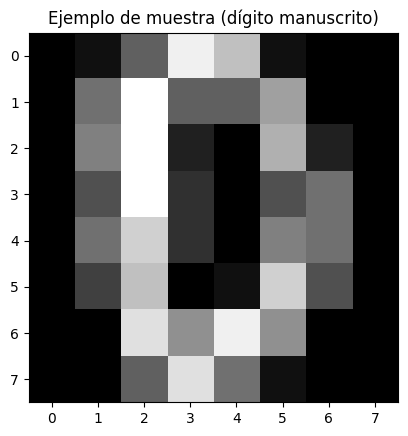

   Clase  Frecuencia
0      1         389
1      3         389
2      7         387
3      4         387
4      9         382
5      2         380
6      8         380
7      6         377
8      0         376
9      5         376



Los estadísticos descriptivos del conjunto de entrenamiento son, por característica:

           0            1            2            3            4   \
count  3823.0  3823.000000  3823.000000  3823.000000  3823.000000   
mean      0.0     0.301334     5.481821    11.805912    11.451478   
std       0.0     0.866986     4.631601     4.259811     4.537556   
min       0.0     0.000000     0.000000     0.000000     0.000000   
25%       0.0     0.000000     1.000000    10.000000     9.000000   
50%       0.0     0.000000     5.000000    13.000000    13.000000   
75%       0.0     0.000000     9.000000    15.000000    15.000000   
max       0.0     8.000000    16.000000    16.000000    16.000000   

                5            6            7            8  

In [17]:
import seaborn as sns

plt.imshow(X_train.loc[0].values.reshape(8,8),cmap='gray')
plt.title("Ejemplo de muestra (dígito manuscrito)")
plt.show()

# También se quiere ver la distribución de las clases
#sns.countplot(y_train)
#plt.title('Distribución de las Clases en el Conjunto de Entrenamiento')
#plt.xlabel('Clase')
#plt.ylabel('Frecuencia')
#plt.show()
# Como esto anterior da una mala gráfica por ser tantas clases, se hace una tabla (clase,frecuencia)
# Además, se muestran los estadísticos descriptivos del conjunto de entrenamiento
#print(X_train)
#print("\n")
#print(y_train)
y_train_series = pd.Series(y_train)
class_counts = y_train_series.value_counts().reset_index()
class_counts.columns = ['Clase', 'Frecuencia']

print(class_counts)

print("\n\n\nLos estadísticos descriptivos del conjunto de entrenamiento son, por característica:\n")
print(X_train.describe())

El problema afrontado parece estar relacionado con la clasificación de dígitos manuscritos en blanco y negro, por lo que se ve en la muestra de ejemplo mostrada por pantalla. Tras visualizar los archivos de entrenamiento y test, se ve que las variables son todas numéricas, por lo que no hará falta tratar alguna característica de forma distinta.

Respecto a la frecuencia de aparición de cada clase, se observa que la distribución es uniforme, por lo que no hay indicios de que una clase vaya a prevalecer sobre el resto.

Observando el resultado de los estadísticos de cada característica, dado por ``describe``, se ve que hay 65 características recogidas para identificar una clase. Se hace un desglose de cada estadístico, indicando su significado:

- ``count``: número de veces que se encuentra la característica, en este caso, en el conjunto de entrenamiento. Es la suma de las frecuencias visualizadas anteriormente.

- ``mean``: Promedio de los valores de la característica. Útil para comparar conjuntos de datos pero se dispara con los outliers.

- ``std``: Mide la cantidad de variación de datos respecto la media. Sirve para saber cuán cerca están los datos de la media.

- ``min``: Valor más bajo de cada columna.

- ``25%``: Valor que tiene debajo al 25% de los datos. Es el primer cuartil.

- ``50%``: Valor medio de cada columna. Coincide con la mediana. El 50% de los datos están por debajo de ese valor. Menos sensible a outliers, por lo que es útil en distribuciones asimétricas.

- ``75%``: Tercer cuartil, tiene por debajo al 75% de los valores de la columna. Se podría detectar valores atípicos en el extremo superior.

- ``max``: Máximo de cada columna. Se podrían detectar outliers con él.


Se podría intuir que los valores de todas las columnas se encuentran entre 0 y 16. Además, si se observan los valores de los cuartiles podría pensarse que no hay outliers en el conjunto de entrenamiento. Se verá entonces si el entrenamiento tiene valores perdidos, en cuyo caso se pensará qué hacer con ellos.

Para hacer un análisis más profundo de la distribución de los datos, se visualizan algunas gráficas o boxplots (por ejemplo, la tabla de frecuencias anterior se podría representar como un gráfico de barras).

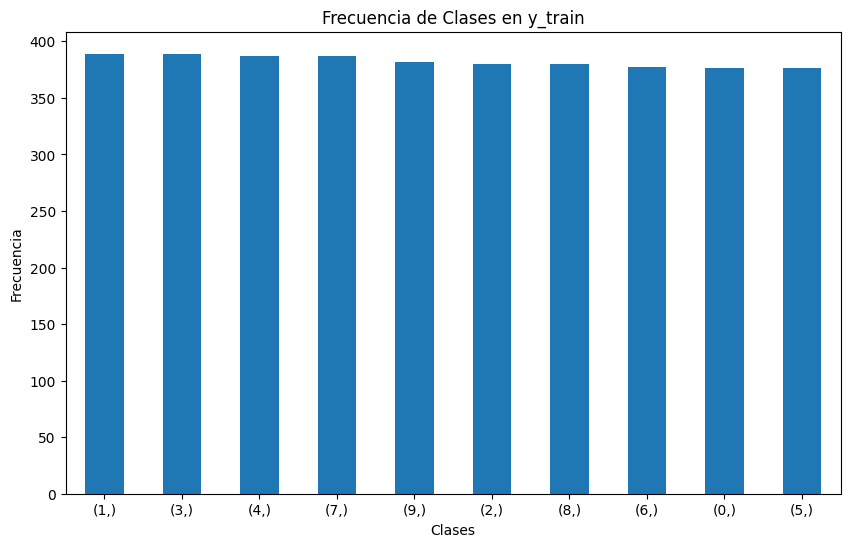

In [18]:
# Convertir y_train a DataFrame para facilitar la manipulación
y_train_df = pd.DataFrame(y_train)

# Contar frecuencias de cada clase
class_counts = y_train_df.value_counts()
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Frecuencia de Clases en y_train')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)  # Mantiene las etiquetas de las clases horizontales
plt.show()

Gráficamente se observa que están las clases bien balanceadas en general, con 1 y 3 teniendo más repeticiones y 6,0,5 los que menos.

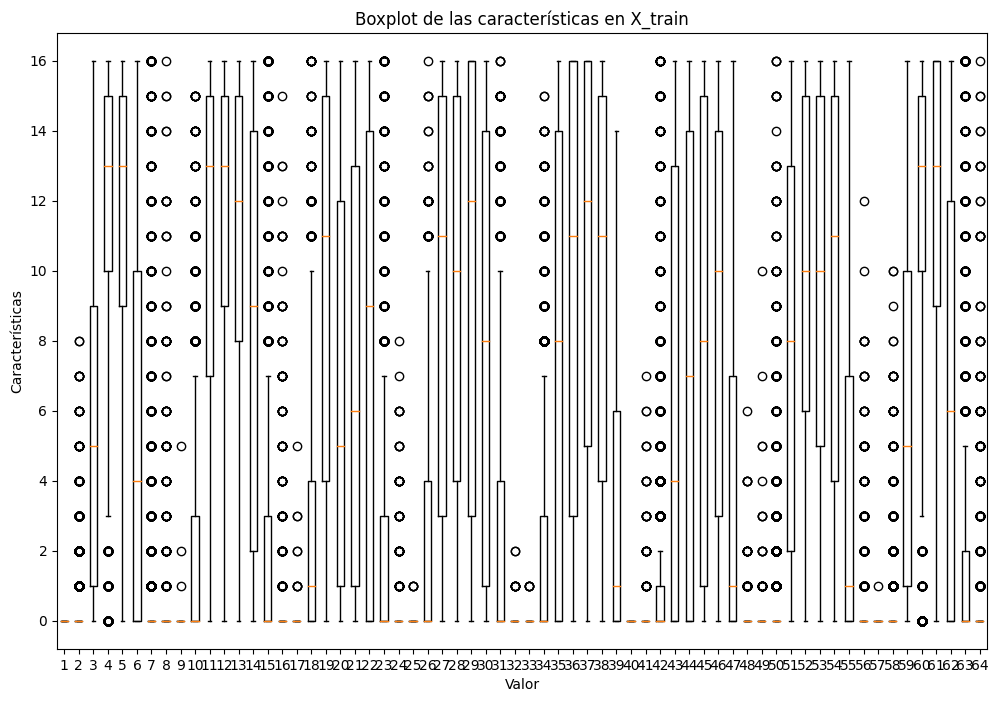

In [19]:
plt.figure(figsize=(12,8))
plt.boxplot(X_train,vert=True) # A True para cajas verticales
plt.title('Boxplot de las características en X_train')
plt.xlabel('Valor')
plt.ylabel('Características')
plt.show()

Para los valores de las características en el conjunto de entrenamiento se obtiene el boxplot anterior, que indica lo siguiente:
- La distribución de ciertas características es relativamente simétrica alrededor de la mediana, estando otras sesgadas por sus medianas más cercanas al primer o tercer cuartil (cada caja cubre desde el primer hasta el tercer cuartil con respecto a los valores de la característica en cuestión)

- Hay características que tienen rangos que se extienden hasta el valor 16 (esto se puede observar por lo dado en `.describe()` en el apartado `max`.

- Tal y como se podía ver en la tabla, por ejemplo en la característica 6, que tiene una media muy baja, cuartil 3 nulo, hay presencia de outliers. Sin embargo, debido a que los intervalos son bastante acotados, de longitud baja y que no son muchos (con respecto al número de muestras, los puntos en el boxplot que son los outliers no son muchos) no se tratarán demasiado, más allá de normalizar y estandarizar los datos en el preprocesado.

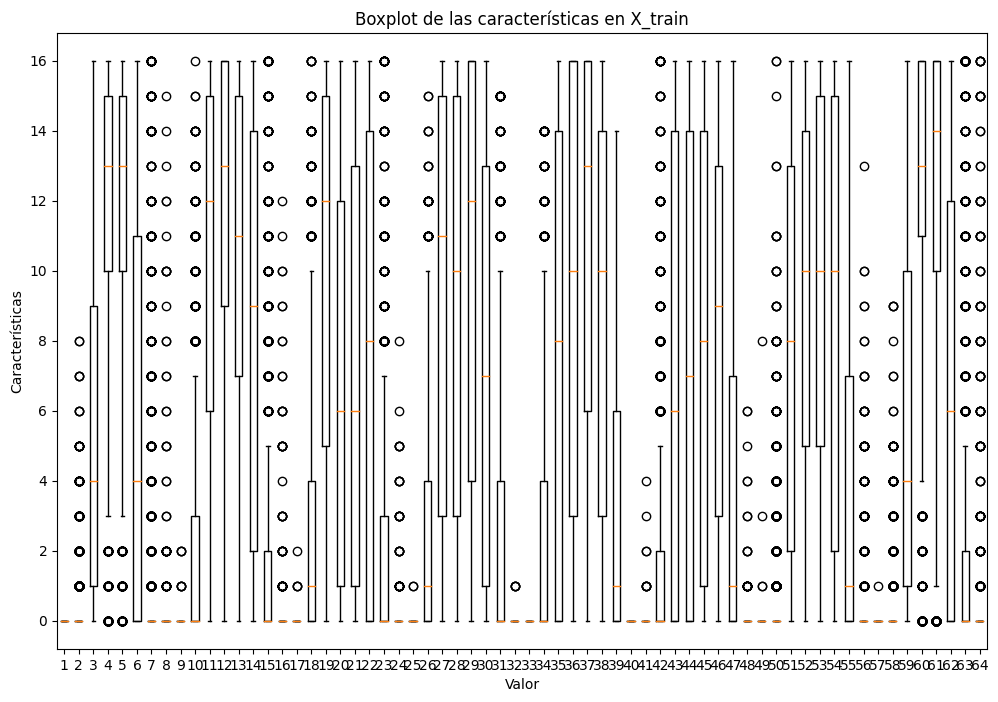

In [20]:
plt.figure(figsize=(12,8))
plt.boxplot(X_test,vert=True) # A True para cajas verticales
plt.title('Boxplot de las características en X_train')
plt.xlabel('Valor')
plt.ylabel('Características')
plt.show()

En el caso del boxplot para el conjunto de test, se deduce:

- Hay algunas características con distribución, en general, consistente, mientras que otras no tienen una distribución muy uniforme, habiendo más variablidad en unas características que en otras (esto se traduce en la cantidad de desviación típica dada en `.describe()`).

- Al igual que en el caso del entrenamiento, hay características simétricas y otras sesgadas por la distribución (primer y/o tercer cuartil). Esto se ve por la posición de la mediana (línea naranja).

- La dispersión de datos es mayor en unas características que en otras (esto está ligado al primer punto explicado).

- Con respecto a la presencia de outliers, se comenta y justifica lo mismo que en el caso del boxplot del conjunto de entrenamiento.

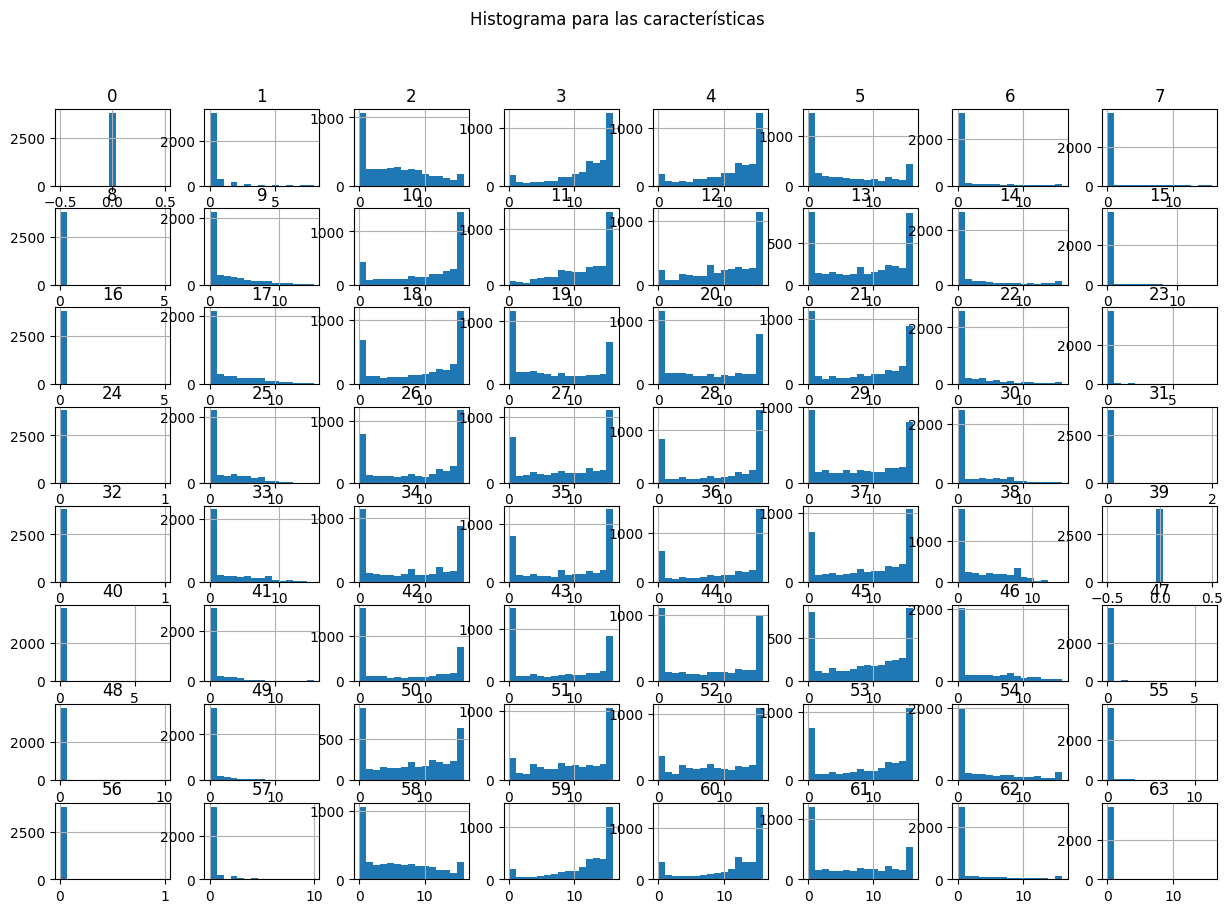

In [21]:
# Otros elementos para analizar como la matriz de correlación, aunque al haber
# tantas características, no se va a ver bien
#corr_matriz = pd.DataFrame(X_train).corr()

#plt.figure(figsize=(10,8))
#sns.heatmap(corr_matriz,annot=True,fmt=".2f",cmap="coolwarm")
#plt.title('Matriz de correlación de X_train')
#plt.show()

# Otros elementos como histogramas para X_train
X_tr_df = pd.DataFrame(X_train)
X_tr_df.hist(bins=15,figsize=(15,10),layout=(8,8))
plt.suptitle('Histograma para las características')
plt.show()

En la matriz de histogramas se muestra la distribución de los datos por característica. Se observa que a los extremos de la matriz (características 0,1 hasta las características 62,63, entre otros), los extremos de la gráfica tienen más densidad que otros, lo que muestra una distribución de datos sesgada. Además, indican no tener gran variabilidad, además de la presencia de algunos outliers como ocurre en la característica 6.

Ahora vemos si hay valores perdidos

In [22]:
lost_values = X_train.isnull().values.any()

if lost_values:
  print("Hay valores perdidos")
  # Número de valores perdidos por columnas
  count_lost_values = X_train.isnull().sum()
  print("Número de valores perdidos por columnas:\n",count_lost_values)

  # Proporción valores perdidos por columna
  prop_lost_values = X_train.isnull().mean()
  print("Proporción de valores perdidos por columnas:\n",prop_lost_values)

In [23]:
lost_values = X_test.isnull().values.any()

if lost_values:
  print("Hay valores perdidos")
  # Número de valores perdidos por columnas
  count_lost_values = X_test.isnull().sum()
  print("Número de valores perdidos por columnas:\n",count_lost_values)

  # Proporción valores perdidos por columna
  prop_lost_values = X_test.isnull().mean()
  print("Proporción de valores perdidos por columnas:\n",prop_lost_values)

Como no hay valores perdidos ni en entrenamiento ni en test, se discute si habría que normalizar los valores de las características. En caso afirmativo, también habría que normalizar las características en el test (no se discute la presencia de outliers, puesto que es un problema de clasificación de imágenes, aunque en un problema de regresión habría que ver si los hay).

Primero se calculará tanto el mínimo como el máximo de todos los mínimos y máximos de las columnas.

In [24]:
descr = X_train.describe()

min_values = descr.loc['min']
max_values = descr.loc['max']

for i in range(len(min_values)-1):
  if((max_values[i]-min_values[i]) != (max_values[i+1]-min_values[i+1])):
    print("Hay características con rangos distintos, hay que escalar a [0,1]")
    break
  if (min_values[i] != min_values[i+1] or max_values[i] != max_values[i+1]):
    print("Hay extremos distintos entre la muestra "+str(i)+" y "+str(i+1))

Hay características con rangos distintos, hay que escalar a [0,1]


Se observa que las longitudes de los intervalos de cada característica son distintos, por lo que es necesario escalar las características al intervalo [0,1], pues hay algoritmos como KNN que son sensibles a estos caso. En general, los valores de las características son en general buenos, por lo que no sería totalmente necesario preprocesar mucho los datos, aunque se hará para practicar.



In [25]:
from sklearn.preprocessing import MinMaxScaler

scal_0_1 = MinMaxScaler()

X_train_0_1 = scal_0_1.fit_transform(X_train)
X_test_0_1 = scal_0_1.fit_transform(X_test)

Veamos que efectivamente ya no hay problemas con el rango de las caracteristicas, primero en entrenamiento y luego en test.

In [26]:
X_train_0_1_df = pd.DataFrame(X_train_0_1,columns=X_train.columns)
descr = X_train_0_1_df.describe()

#print(descr)
min_values = descr.loc['min']
max_values = descr.loc['max']
print("ENTRENAMIENTO")
for i in range(len(min_values)-1):
  print("["+str(min_values[i])+","+str(max_values[i])+"]")

X_test_0_1_df = pd.DataFrame(X_test_0_1,columns=X_test.columns)
descr = X_test_0_1_df.describe()

min_values = descr.loc['min']
max_values = descr.loc['max']
print("TEST")
for i in range(len(min_values)-1):
  print("["+str(min_values[i])+","+str(max_values[i])+"]")

ENTRENAMIENTO
[0.0,0.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,0.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
TEST
[0.0,0.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,1.0]
[0.0,0.0]
[0.0,1.0]
[0.0,1.0]
[

Todos los valores salvo ciertas excepciones han sido normalizados al [0,1]. Las excepciones son aquellas en que sus estadísticos son nulos, indicando que valen igual a la media (por la desviación típica nula) y que son constantemente cero (por la media nula que aparecía al describir los estadísticos). Se intuye que con alguna técnica de reducción de características van a desaparecer.

A continuación, se escalan las características de entrenamiento y test a tener media nula y desviación típica 1.

In [27]:
from sklearn.preprocessing import StandardScaler

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_0_1_df)
X_test_scaled = scaler.transform(X_test_0_1_df)

Tras el escalado las características pasan a tener media nula y desviación típica 1

In [28]:
print("Las características de train antes de procesar son las siguientes:")
print(X_train.describe())
print("Las características de train ya procesadas son las siguientes:")
X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train.columns)
print(X_train_scaled_df.describe())

print("Las características de test antes de procesar son")
print(X_test.describe())
print("Las características de test ya procesadas son")
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=X_test.columns)
print(X_test_scaled_df.describe())

Las características de train antes de procesar son las siguientes:
           0            1            2            3            4   \
count  3823.0  3823.000000  3823.000000  3823.000000  3823.000000   
mean      0.0     0.301334     5.481821    11.805912    11.451478   
std       0.0     0.866986     4.631601     4.259811     4.537556   
min       0.0     0.000000     0.000000     0.000000     0.000000   
25%       0.0     0.000000     1.000000    10.000000     9.000000   
50%       0.0     0.000000     5.000000    13.000000    13.000000   
75%       0.0     0.000000     9.000000    15.000000    15.000000   
max       0.0     8.000000    16.000000    16.000000    16.000000   

                5            6            7            8            9   ...  \
count  3823.000000  3823.000000  3823.000000  3823.000000  3823.000000  ...   
mean      5.505362     1.387392     0.142297     0.002093     1.960502  ...   
std       5.613060     3.371444     1.051598     0.088572     3.052353  ..

En general, tras escalar, las características han pasado a ser de media 0 y desviación típica 1. Esto será útil para la aplicación de algunos algoritmos de aprendizaje supervisado. Nótese que no son valores exactos, pues la forma de cálculo es restar, a cada valor, la media de la característica y dividir por la desviación típica.

Para acabar el preprocesado de datos, se realiza reducción de características. Al no haber muchas características, se utilizará solo el análisis de componentes principales a los conjuntos de características de entrenamiento y test. Se puede deducir que las características de valor constante, como la primera, van a desaparecer, que pueden formar parte de las esquinas del dígito.

In [29]:
from sklearn.decomposition import PCA

#pca = PCA().fit(X_train_scaled_df)

#plt.figure(figsize=(8,5))
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlabel("Número de componentes")
#plt.ylabel("Varianza explicada")
#plt.show()

# Queremos que se conserve cierta varianza, así que ponemos al 90% por ejemplo (explicar)
#pca = PCA(n_components=0.9)
#X_reduced = pca.fit_transform(X_train_scaled_df)
# Aplicar PCA manteniendo el 98% de la varianza
pca = PCA(n_components=0.98)
X_train_pca = pca.fit_transform(X_train_scaled_df)
X_test_pca = pca.transform(X_test_scaled_df)

# Número original de características
original_features = X_train_scaled_df.shape[1]

# Número de características después de PCA
reduced_features = pca.n_components_

# Características eliminadas
eliminated_features_count = original_features - reduced_features

# Mostrar cuántas características se han eliminado
print(f"Número original de características: {original_features}")
print(f"Número de características retenidas por PCA: {reduced_features}")
print(f"Número de características eliminadas: {eliminated_features_count}")

Número original de características: 64
Número de características retenidas por PCA: 51
Número de características eliminadas: 13


Con el argumento ``n_components=e`` se busca obtener la cantidad mínima de características con las cuales se explica el e*100% de la varianza de los datos si $e \in [0,1]$. En el caso $e \in \mathbb{N}$, reduce a $e$ dimensiones.

Se escoge explicar el 98% de la variabilidad de los datos debido a que hay pocas características y no es conveniente perder mucha información.

Ahora se hace la definición de una función para entrenar y validar varios modelos seleccionados para la resolución del problema.

In [30]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

X_train_pca_df = pd.DataFrame(X_train_pca,columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])
X_test_pca_df = pd.DataFrame(X_test_pca,columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])])


def validationModel(modelo,X_train,y_train,X_test,y_test):
  # Definición del método cross-validation
  cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42) # Para trabajar con cross-validation, es bastante útil si las clases están desbalanceadas

  # Calculamos los scores de la validación cruzada
  cv_scores = cross_val_score(modelo,X_train,y_train,cv=cv,scoring='accuracy')

  #print(f"Modelo: {modelo.class.name}")
  print(f"CV Accuracy scores: {cv_scores}")
  print(f"Precisión del CV media: {np.mean(cv_scores)}")
  print(f"Varianza del CV: {np.var(cv_scores)}")

  modelo.fit(X_train,y_train)
  predictions = modelo.predict(X_test)
  pred_tr = modelo.predict(X_train)
  conf_matrix_train = confusion_matrix(y_train,pred_tr)
  print("Matriz de Confusión - Entrenamiento:")
  print(conf_matrix_train)
  conf_matrix_test = confusion_matrix(y_test,predictions)
  print("Matriz de confusión - Test:")
  print(conf_matrix_test)
  print("Precisión:",accuracy_score(y_test,predictions))
  print("Informe de la clasificación:\n",classification_report(y_test,predictions))

Las métricas usadas para validar el modelo son:

- Lista con las precisiones del CV: Tantos elementos como número de divisiones tenga CV, indica la precisión en la predicción del test en cada iteración.

- Precisión Media del CV: Media de las precisiones obtenidas en cada división. Ofrece una visión general de cómo funciona el modelo.

- Varianza del CV: Indica la variabilidad de cada precisión con la media de estas. A mayor varianza, más cambia el comportamiento del modelo en función de los datos.

- Matriz de confusión: Se muestra tanto de entrenamiento (para ver si hay algún fallo, aunque normalmente solo debería haber valores positivos fuera de la diagonal) como de test (crucial para evaluar el rendimiento del modelo, pues muestra la proporción de todas las predicciones correctas en relación con las realizadas). El primer elemento son verdaderos positivos

Las siguientes métricas se hacen por clase:

- Precisión: Proporción de las predicciones correctas de la clase sobre las hechas. A mayor valor, mayor número de predicciones correctas.

- Recall: Proporción de las predicciones correctas para una clase sobre el total de instancias reales de esa clase en los datos.

- F1-Score: Media armónica de la precisión y recall, indicando si hay balance o no entre las dos (a mayor valor, mayor balance).

- Soporte: Número de ocurrencias reales de la clase en el conjunto, que se usa para ver el impacto de un posible desbalance de las clases (aunque no es el caso en este conjunto de datos).

Tras crear la función para validar el modelo, vamos a elegir una serie de modelos para ejecutar y comparar los resultados

Elección de modelos y justificación:
- k-nn: Simple y efectivo, aunque mucho tiempo. Hay que buscar un buen k, así que probar con varios. Escalado de características crucial para este algoritmo.
- SVM: Efectivo en MNIST, sobre todo para capturar relaciones no lineales. Necesario escalar características en el preprocesamiento. Experimentar los parámetros.
- Random Forest: No es tan bueno, pero tiene buena relación rendimiento-tiempo.
- Stacking: Mejora bastante la precisión en las predicciones y reduce el sobreajuste a los datos de entrenamiento.

Se podrían usar otros algoritmos como las redes neuronales convolucionales al tratarse de un problema de clasificación de imágenes (sería conveniente, entonces, haber hecho data augmentation en el preprocesamiento) o Gradient Boosting Machine (GBM)


In [31]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

Tras haber seleccionado los modelos con los que experimentar, por modelo se eligen los hiperparámetros convenientes, y se procede a analizar resultados y elegir el modelo que mejor clasifica. Esto se puede realizar porque la cantidad de muestras no es muy elevada. En caso de mucha mayor dimensión o bastantes más muestras habría que hacer un estudio sobre el hiperparámetro óptimo, o usar funciones como `GridSearchCV`.

**K-NN**

In [ ]:
neighbours = [1,2,3,4,5,6,7,8,9,10]

# Se experimentan con varios vecinos y veamos cuál es mejor
for neighbour in neighbours:
  knn = KNeighborsClassifier(n_neighbors=neighbour)
  #knn.fit(X_train,y_train)

  print("Evaluación del modelo K-NN con K="+str(neighbour))
  validationModel(knn,X_train_pca_df,y_train,X_test_pca_df,y_test)

Evaluación del modelo K-NN con K=1
CV Accuracy scores: [0.97385621 0.97908497 0.97254902 0.97905759 0.97120419]
Precisión del CV media: 0.9751503952366287
Varianza del CV: 1.0952332324823335e-05
Matriz de Confusión - Entrenamiento:
[[376   0   0   0   0   0   0   0   0   0]
 [  0 389   0   0   0   0   0   0   0   0]
 [  0   0 380   0   0   0   0   0   0   0]
 [  0   0   0 389   0   0   0   0   0   0]
 [  0   0   0   0 387   0   0   0   0   0]
 [  0   0   0   0   0 376   0   0   0   0]
 [  0   0   0   0   0   0 377   0   0   0]
 [  0   0   0   0   0   0   0 387   0   0]
 [  0   0   0   0   0   0   0   0 380   0]
 [  0   0   0   0   0   0   0   0   0 382]]
Matriz de confusión - Test:
[[178   0   0   0   0   0   0   0   0   0]
 [  0 180   0   0   0   0   1   0   1   0]
 [  0   8 167   0   0   0   0   0   2   0]
 [  0   0   2 174   0   2   0   1   3   1]
 [  0   1   0   0 178   0   0   0   2   0]
 [  0   0   0   1   0 179   1   0   0   1]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   

El algoritmo KNN se implementa con la clase de *scikit-learn* llamada **KNeighboursClassifier**. Tiene muchos parámetros, siendo el más importante `n_neighbours`:
- `n_neighbours`: Número de vecinos más cercanos al dato, por defecto a 5. Cuanto más pequeño sea es más sensible al ruido y a mayor valor el algoritmo puede ser insensible a las verdaderas fronteras entre clases.
- `weights`: Por defecto a `uniform`, define la ponderación de los vecinos. Otros valores son `distance` y `callable`. El argumento usado es el por defecto, donde todos los vecinos tienen mismo peso.
- `algorithm`: Algoritmo para calcular los vecinos más cercanos. Se usa el argumento por defecto, `auto`, encontrando al vecino más apropiado según el argumento de `fit`.
- `leaf_size`: Afecta a la velocidad de construción y consulta del árbol construido internamente. Por defecto es 30.
- `p`: Métrica usada. Por defecto `p=2` es la distancia euclídea.
- `metric`: Métrica usada en el árbol, por defecto la de Minkowski.
- `metric_params`: Si la métrica tiene parámetros, se pasan como este argumento.
- `n_jobs`: Específica el número de trabajos paralelos que se ejecutan para buscar vecinos. Si está a -1, se usan todos los procesadores. Por defecto, está a 1.

Con respecto a la ejecución, se usan todos los valores por defecto (como el uso de la distancia euclídea, aunque se podría probar con otras como la distancia de Manhattan) a excepción del número de vecinos, variable de 1 a 10. Se puede observar que los resultados arrojados por cross-validation para 5 particiones son bastante buenos en general, sin bajar de la tasa de 0.97 para todos los $K$ usados. Sin embargo, el que mejores valores da es el caso $K=3$. Por otra parte, para $K=3$ se ve que generaliza en general bien por los resultados dados en la evaluación de los datos para el test. Por lo tanto, si se escogiese el algoritmo KNN, se usaría para **$K=3$**, que da en cross-validation una precisión media de **0.9761975156554769**.

Todos estos resultados se pueden observar también en las respectivas matrices de confusión, donde la tasa de aciertos es muy elevada (números de la diagonal) en comparación a falsos positivos o falsos negativos (elementos fuera de la diagonal). Como último apunte, la varianza en cada modelo es bastante pequeña para todo $K$ escogido, por lo que la variabilidad de los datos no es muy alta, siendo estos bastante parecidos a su media.

Con respecto al resto de métricas, la métrica F1 da, por clase, una tasa en general uniforme, aunque en el caso de la clase 0, el modelo tiene una robustez perfecta. Otras como Recall mide la tasa de verdaderos positivos, esto es, la proporción de positivos reales con respecto a los verdaderos positivos y los falsos negativos. Por clase, tiene un valor muy alto, lo que indica que el modelo da una gran parte de verdaderos positivos. Esto será extrapolable al resto de modelos usados en el ejercicio.

**SVM**

In [ ]:
kernel_types = ['linear','poly','rbf','sigmoid']
degrees = [1,2,3,4,5]   # Este solo para 'poly'

for kern in kernel_types:
  if kern == 'poly':
    for deg in degrees:
      svm = SVC(kernel=kern,degree=deg)
      print("Tipo de kernel: "+kern+". Grado: "+str(deg))
      validationModel(svm,X_train_pca,y_train,X_test_pca,y_test)
  else:
    svm = SVC(kernel=kern)
    print("Tipo de kernel: "+kern)
    validationModel(svm,X_train_pca_df,y_train,X_test_pca_df,y_test)

Tipo de kernel: linear
CV Accuracy scores: [0.97908497 0.9751634  0.98300654 0.98298429 0.96858639]
Precisión del CV media: 0.9777651165178114
Varianza del CV: 2.949445843598738e-05
Matriz de Confusión - Entrenamiento:
[[376   0   0   0   0   0   0   0   0   0]
 [  0 388   0   0   0   0   0   0   0   1]
 [  0   0 380   0   0   0   0   0   0   0]
 [  0   0   0 389   0   0   0   0   0   0]
 [  0   0   0   0 387   0   0   0   0   0]
 [  0   0   0   0   0 376   0   0   0   0]
 [  0   0   0   0   0   0 377   0   0   0]
 [  0   0   0   0   0   0   0 387   0   0]
 [  0   2   0   0   0   0   0   0 378   0]
 [  0   0   0   0   0   0   0   0   0 382]]
Matriz de confusión - Test:
[[178   0   0   0   0   0   0   0   0   0]
 [  0 175   0   0   0   1   3   0   1   2]
 [  0   4 171   0   0   0   2   0   0   0]
 [  1   0   6 171   0   2   0   1   1   1]
 [  0   0   0   0 180   0   0   0   1   0]
 [  0   0   0   1   0 180   0   0   0   1]
 [  1   2   0   0   1   0 177   0   0   0]
 [  0   0   0   0   1

Para el uso del algoritmo SVM en clasificación se usa la clase de *scikit-learn*, llamada **SVC**. Algunos de los hiperparámetros son:

- `C`: Para regularizar el SVM, a mayor valor, mejor intentará clasificar, y a menor valor suaviza la frontera de decisión. Por defecto es 1.
- `kernel`: Tipo de kernel que usará el algoritmo. Por defecto a `rbf`.
- `degree`: Pra el kernel `poly`, indica el grado del polinomio. Por defecto está a 3.
- `gamma`: Coeficiente para `rbf`,`poly` y `sigmoid`. Por defecto está a `scale`, esto es, $\frac{1}{(n_features*X.var())}$.
- `coef0`: Término independiente para `poly` y `sigmoid`. Por defecto está a 0.
- `shrinking`: Si se usa la heurística de encogimiento, por defecto a True.
- `probability`: Si está activado, ralentiza el método `fit` por usar validación cruzada para estimar las probabilidades internamente.
- `tol`: Tolerancia para parada.
- `max_iter`: Criterio de parada según iteraciones, por defecto a -1.


Para una ejecución simple del algoritmo SVM para clasificación, se usan solo los hiperparámetros `kernel` y `degree`. Se experimenta con algunos kernels disponibles para resolver el problema, y en el caso del kernel polinómico, se usan varios grados, para ver cuál da mejor resultado. Cada kernel significa:

- `linear`: No transforma el espacio de entrada y busca un hiperplano para una separación lineal de las clases. Útil cuando los datos son linealmente separables o el número de dimensiones es alta en comparación al número de muestras.
- `poly`: Hace una transformación polinómica según el grado y coeficiente independiente (en este caso, 0, obligando a que pase por el origen). Útil para capturar relaciones entre características que son más que lineales pero no tan rígidas como para aplicar un kernel RBF.
- `RBF`: Kernel gaussiano, permite manejar transformaciones no lineales y de dimensión infinita. Útil cuando no se conocer la distribución de los datos.
- `sigmoid`: Se transforman los datos usando una función sigmoide, como en las redes neuronales. En la práctica puede dar malos resultados porque no necesariamente va a generar una matriz de kernel semidefinida positiva (teorema del kernel).

En relación a los resultados, se puede observar que solo con el uso de un kernel lineal se obtienen buenos resultados en cuanto a precisión media, superado por algún caso de kernel polinómico y el kernel RBF. Dentro del kernel polinómico, dentro de que todos los grados dan, en general, buenos resultados, el mejor resultado lo da el polinomio de grado 2, intuyendo que en los polinomios de grado 4 en adelante, el modelo va a tender a sobreajustarse (obsérvese los elementos fuera de la diagonal de la matriz de confusión en test), aunque en otros casos parece haber tendencia al infraentrenamiento como el el kernel polinómico de grado 5 (intuido por la precisión más baja que el resto al comparar en test). Por último, el kernel sigmoide es el que da uno de los peores resultados en general de todos los usados en la experimentación, posiblemente porque no se cumpla el teorema del kernel con el kernel obtenido para el conjunto de datos usado. Si se tuviese que elegir un caso de los mostrados, se escogería el kernel polinómico de grado 2 si el coste computacional fuese importante, pues el RBF usa una función exponencial. Sin embargo, como las diferencias son mínimas, se escogería el **kernel polinómico de grado 2 y coeficiente independiente nulo** por los resultados medios arrojados, en comparación al resto (aunque se obligue a pasar por el origen, como el coeficiente independiente se pasa como hiperparámetro, no implica que ser de valor no nulo dé más flexibilidad al modelo), con una precisión media en cross-validation de **0.980904424597064**. Remarcar que, en términos de la variabilidad de los datos, RBF presenta una muy ligera varianza superior al kernel polinómico de grado 2, por lo que no sería determinante en la elección del modelo.

**Random Forests**

In [ ]:
estimators = [100,200,300,400,500,600,700,800,900,1000] # Número de árboles

for est in estimators:
  rf = RandomForestClassifier(n_estimators=est)
  print("Random Forest con "+str(est)+" árboles")
  validationModel(rf,X_train_pca_df,y_train,X_test_pca_df,y_test)

Random Forest con 100 árboles
CV Accuracy scores: [0.95424837 0.96862745 0.97124183 0.97251309 0.95026178]
Precisión del CV media: 0.9633785032337542
Varianza del CV: 8.564636996731309e-05
Matriz de Confusión - Entrenamiento:
[[376   0   0   0   0   0   0   0   0   0]
 [  0 389   0   0   0   0   0   0   0   0]
 [  0   0 380   0   0   0   0   0   0   0]
 [  0   0   0 389   0   0   0   0   0   0]
 [  0   0   0   0 387   0   0   0   0   0]
 [  0   0   0   0   0 376   0   0   0   0]
 [  0   0   0   0   0   0 377   0   0   0]
 [  0   0   0   0   0   0   0 387   0   0]
 [  0   0   0   0   0   0   0   0 380   0]
 [  0   0   0   0   0   0   0   0   0 382]]
Matriz de confusión - Test:
[[177   0   0   0   1   0   0   0   0   0]
 [  0 176   0   0   0   0   3   0   1   2]
 [  0   5 169   0   1   0   1   1   0   0]
 [  0   0   4 166   0   4   0   5   0   4]
 [  0   1   0   0 178   0   0   0   2   0]
 [  0   0   1   0   0 178   0   1   0   2]
 [  1   1   0   0   0   0 179   0   0   0]
 [  0   0   0 

Otro de los algoritmos de aprendizaje supervisado usados es el *random forest*, implementado en *scikit-learn* con la clase **RandomForestClassifier** (para problemas de clasificación). Algunos de los hiperparámetros más relevantes son:

- `n_estimators`: De los parámetros más importantes, indica el número de árboles del bosque.
- `criterion`: Mide la claridad de la división. Por defecto está a `gini`, con la impureza de Gini.
- `max_depth`: Por defecto a `None`, con los árboles creciendo hasta que todas las hojas sean puras o tengan menos muestras que las dadas en `min_samples_split`.
- `min_samples_split`: Por defecto a 2, número mínimo de muestras requeridas para dividir un nodo interno.
- `min_samples_leaf`: Por defecto a 1, es el número mínimo de muestras para ser una hoja de un nodo.
- `max_features`: Número de características a considerar cuando se busca la mejor división.

Se ha experimentado con varios valores para el hiperparámetro `n_estimators`, desde 100 hasta 1000 árboles, suponiendo un mayor coste computacional a mayor número de árboles. Teniendo en cuenta la precisión media dada por cross-validation,  puede observarse que es una función discreta definida sobre $\{100,200,300,...,1000\}$, con máximos en 500 y 800 árboles, considerando el valor de 500 árboles un máximo absoluto local, dando una precisión media de **0.9701789686206069**. En general, todos los modelos generalizan bien, con unas tasas mayores a 0.95 de precisión media en el test. Si el coste computacional no fuese un problema, se usaría **random forest con 500 árboles**, con una precisión media en cross-validation de **0.9701789686206069**. Si fuese importante minimizar coste computacional, se podría usar un random forest de 100 árboles, pues tiene buenas métricas medias y generaliza en general bien (aunque algo peor que el resto). De nuevo, no se usa la variabilidad de los datos para discriminar modelos porque son valores muy cercanos a cero.

**Stacking**

El algoritmo de *stacking* se implementa en *scikit-learn* con la clase **StackinClassifier** para problemas de clasificación. En general, varios modelos de clasificación más simples son mezclados para construir otro modelo más robusto y complejo. Por ello, se separa en:
- **Modelos base**: Forman la primera etapa del *stacking*. Son entrenados de forma independiente entre si, por lo que se pueden capturar patrones distintos que no podrían ser tomados totalmente si solo se usase uno. Se pretende obtener más diversidad en los patrones y características que identifican los datos y mejorar la precisión en la predicción.

- **Meta-Modelo**: Está en un nivel superior a los modelos base, y es entrenado con las salidas dadas en estos. Las características de los modelos base se usan como datos de entrada en este modelo, intentando corregir los errores producidos en los modelos base y combinar aspectos fuertes de los distintos modelos.

Como modelo base se usa SVM junto a un árbol de decisión, y como meta-modelo se usa la regresión logística. Se usa árbol de decisión para manejar no linealidades y manejar datos heterogéneos, junto a SVM para suplir varias debilidades de los árboles de decisión como el sobreajuste. Además, la salido de los modelos base entrenarán una regresión logística por ser un modelo simple, eficiente y corregir los datos de salida de los modelos base que no calibran bien en sus predicciones.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

modelos_base = [
    ('svc',SVC(probability=True)),
    ('dt',DecisionTreeClassifier())
]

meta_modelo = LogisticRegression()

In [ ]:
st = StackingClassifier(estimators = modelos_base, final_estimator=meta_modelo)

validationModel(st,X_train_pca_df,y_train,X_test_pca_df,y_test)

CV Accuracy scores: [0.97647059 0.9869281  0.98169935 0.9921466  0.97643979]
Precisión del CV media: 0.9827368853300482
Varianza del CV: 3.7221071690933844e-05
Matriz de Confusión - Entrenamiento:
[[376   0   0   0   0   0   0   0   0   0]
 [  0 388   0   0   0   0   0   0   0   1]
 [  0   0 380   0   0   0   0   0   0   0]
 [  0   0   0 388   0   1   0   0   0   0]
 [  0   0   0   0 386   0   0   0   0   1]
 [  0   0   0   0   0 375   0   0   0   1]
 [  0   1   0   0   0   0 376   0   0   0]
 [  0   0   0   0   0   0   0 387   0   0]
 [  0   3   0   0   0   0   0   0 377   0]
 [  0   0   0   0   1   0   0   0   0 381]]
Matriz de confusión - Test:
[[177   0   0   0   1   0   0   0   0   0]
 [  0 178   0   0   0   0   2   0   2   0]
 [  0   7 167   0   1   0   0   0   2   0]
 [  0   0   1 175   2   1   0   0   2   2]
 [  0   1   0   0 178   0   0   0   2   0]
 [  0   0   0   0   1 180   0   0   0   1]
 [  1   0   0   0   2   0 178   0   0   0]
 [  0   0   0   0   0   0   0 172   0   7]


Debido a la alta complejidad que puede suponer construir un modelo *stacking*, se usan todos los hiperparámetros por defecto de los modelos que lo constituyen a excepción de `probability` de SVM para clasificación, que se establece a True para que el meta-modelo pueda aprovechar las entradas basadas en probabilidades dadas por el SVM.

En relación a los resultados obtenidos en la validación del modelo, la variabilidad de los datos es muy pequeña, y en cross-validation la precisión media es bastante alta, con valor de **0.9827368853300482**. Junto al valor de la precisión media en test, se puede afirmar que es un modelo que generaliza bastante bien y tiene una tasa alta de aciertos, lo cual era esperable de la mezcla de varios modelos intentando aprovechar los puntos fuertes de cada uno.

**Conclusiones**
En primer lugar, se resumen los mejores resultados medios por modelo según las métricas en cross-validation:

- *KNN*: El mejor resultado era para $K=3$, dando una precisión media de 0.9761975156554769.
- *SVM*: El mejor resultado es para el kernel polinómico de grado 2 y coeficiente independiente nulo, con precisión media de 0.980904424597064. Se omite el kernel RBF por ser las diferencias mínimas y suponer más coste computacional.
- *RF*: Suponiendo que el coste computacional no es un problema, se escogerá random forest con 500 árboles, con precisión media de 0.9701789686206069.
- *Stacking*: Con los modelos base (SVM+árbol de decisión) y el meta-modelo (regresión logística) escogidos, la precisión media es de 0.9827368853300482.

Se observa con los resultados que, de mejores a peores resultados, se tiene *stacking*, *SVM con kernel polinómico de grado 2 y coeficiente independiente nulo*,*3NN* y *random forest con 500 árboles*. En resumen, si no hay problemas con el coste computacional, se escoge el modelo **stacking** con los modelos base y meta-modelo expuestos. Por otro lado, si se prefiere no consumir muchos recursos, el uso de **3NN** puede ser acertado, debido a que tras el preprocesado, las dimensiones del problema no son muy altas.



---

## <font color='blue'> Ejercicio 3: PROBLEMA DE REGRESIÓN (4 puntos).

<font color='blue'> En este ejercicio los alumnos se enfrentarán a un problema de regresión, que tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). Más concretamente, se enfrentarán al problema $\textit{YearPredictionMSD}$ (https://archive.ics.uci.edu/dataset/203/yearpredictionmsd). Este conjunto de datos contiene información (características sonoras) de distintas canciones, y el objetivo es predecir el año de publicación de la canción (hay 89 posibles años a predecir). Cada fila/ejemplo contiene 90 valores reales y un valor entero, correspondiente con el año de la canción, en el rango $[1922, 2011]$). En total hay 515345 ejemplos/instancias. El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):
1. <font color='blue'> Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de, al menos, 3 modelos de aprendizaje automático a emplear en la resolución del problema, de los cuales 1 por lo menos debe ser un $ensemble$.
5. Selección y estimación de valores para hiperparámetros (incluyendo el tipo de regularización a usar).
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.


In [32]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [33]:
import numpy as np
datos = np.loadtxt("drive/MyDrive/Colab Notebooks/regresion/YearPredictionMSD.txt",delimiter=",")
datos.shape

(515345, 91)

In [34]:
# Por recomendación de la página donde están los datos, se separan los datos en las primeras 463715 muestras para entrenar y las últimas 51630 para test
datos = pd.DataFrame(datos)
train_data = datos.iloc[:463715]  # Los primeros 463715 ejemplos
test_data = datos.iloc[-51630:]   # Los últimos 51630 ejemplos

Como la recomendación de la página no es "escoger aleatoriamente 463715 muestras para entrenar y 51630 para test", sino que hay un orden, no se usa `train_test_split`. La razón de esto es, según la web, que una canción no aparezca en los dos conjuntos (en otras palabras, sean conjuntos disjuntos). Se separan las características de las clases, previo análisis inicial, y se preprocesan los datos.

Primero hacemos el análisis exploratorio de datos. Se analiza la frecuencia de cada clase con un histograma, entre otros, y se hace un primer acercamiento a la distribución de los datos mirando en sus estadísticos básicos.

Estadísticos descriptivos básicos en entrenamiento
                  0              1              2              3   \
count  463715.000000  463715.000000  463715.000000  463715.000000   
mean     1998.386095      43.385488       1.261091       8.650195   
std        10.939767       6.079139      51.613473      35.264750   
min      1922.000000       1.749000    -337.092500    -301.005060   
25%      1994.000000      39.957540     -26.153810     -11.441920   
50%      2002.000000      44.262570       8.371550      10.470520   
75%      2006.000000      47.833650      36.143780      29.741165   
max      2011.000000      61.970140     384.065730     322.851430   

                  4              5              6              7   \
count  463715.000000  463715.000000  463715.000000  463715.000000   
mean        1.130763      -6.512725      -9.565527      -2.384609   
std        16.334672      22.855820      12.836758      14.580245   
min      -154.183580    -181.953370     -81.794290 

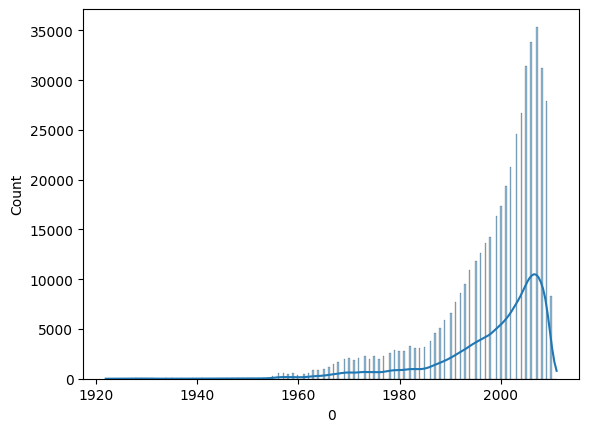

Visualización para análisis exploratorio en test


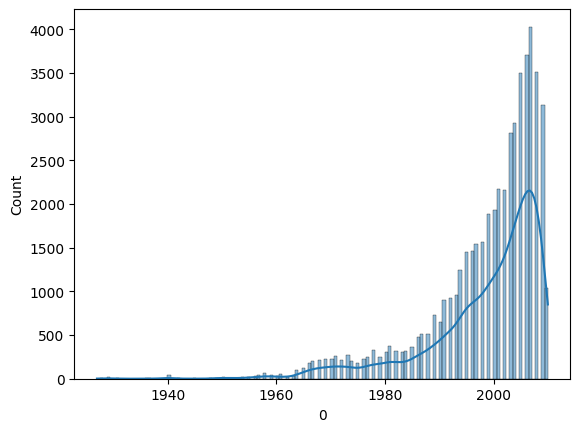

In [35]:
df_train = pd.DataFrame(train_data)  # Trabajamos con pandas mejor, ya declarado en el ejercicio 2
df_test = pd.DataFrame(test_data)

print("Estadísticos descriptivos básicos en entrenamiento")
print(df_train.describe())
print("Estadísticos descriptivos básicos en test")
print(df_test.describe())

print("Visualización para análisis exploratorio en entrenamiento")
sns.histplot(df_train[0],kde=True)  # Según el año
plt.show()
print("Visualización para análisis exploratorio en test")
sns.histplot(df_test[0],kde=True)
plt.show()

#print("Vemos las 4 primeras características")
#for i in range(1,5):
#  sns.scatterplot(x=df[i],y=df[0])
#  plt.show()

Observando los estadísticos descriptivos del conjunto de datos, se puede intuir que hay presencia de outliers (por los valores de `max` según la característica junto a los cuartiles y la media, como en la 90, con un tercer cuartil muy bajo con respecto al máximo). Sería conveniente, sobre todo para aplicar algoritmos como SVM, estandarizar a una distribución de las características con media nula y desviación típica uno, por lo que será parte del preprocesamiento. Además, sería conveniente normalizar los valores a valores, en valor absoluto, entre 0 y 1 para que algoritmos débiles a la varaibilidad en la escala pueda trabajar correctamente, lo cual es otro ejercicio que se hará en el preprocesamiento. Previo a todo esto, se verá si hay valores perdidos y cómo tratarlos en caso de haberlos.

Como comentario a otro estadístico, se observa que hay 90 características y 515345 muestras, por lo que sería bastante recomendable, tras todo el preprocesado anterior, aplicar algún algoritmo de reducción de características para poder mejorar la eficiencia de los modelos de aprendizaje supervisado escogidos.

Respecto a la frecuencia de las clases (años), la distribución no es uniforme, pues se observa mayor peso aproximadamente a partir del año 1970, teniendo mucho peso a partir del año 2000, asi creciendo de forma exponencial. Este comportamiento se repite tanto en entrenamiento como en test.

Se van a separar las clases de las respectivas características para la generación de gráficas para analizar las relaciones estadísticas oportunas.

In [36]:
X_train = df_train.iloc[:,1:]
y_train = df_train.iloc[:,0]
X_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]

In [37]:
print("X_train")
print(X_train)
print("X_test")
print(X_test)

X_train
              1         2         3         4         5         6         7   \
0       49.94357  21.47114  73.07750   8.74861 -17.40628 -13.09905 -25.01202   
1       48.73215  18.42930  70.32679  12.94636 -10.32437 -24.83777   8.76630   
2       50.95714  31.85602  55.81851  13.41693  -6.57898 -18.54940  -3.27872   
3       48.24750  -1.89837  36.29772   2.58776   0.97170 -26.21683   5.05097   
4       50.97020  42.20998  67.09964   8.46791 -15.85279 -16.81409 -12.48207   
...          ...       ...       ...       ...       ...       ...       ...   
463710  46.38102 -16.05772   5.67177  -9.58596 -44.80420  -5.89595 -24.16065   
463711  42.62982  11.63038 -24.00713 -13.48721 -44.12528 -14.34941   6.68187   
463712  44.37612   1.62531  38.16556   2.26337 -14.94471  -6.00659 -32.69876   
463713  44.88723  14.14760  -5.70694 -19.70480 -58.91571 -14.32484  -3.92128   
463714  50.32201   6.71191  54.05607  -7.56020 -39.23615 -10.95161 -40.51556   

              8         9      

In [38]:
print("y_train")
print(y_train)
print("y_test")
print(y_test)

y_train
0         2001.0
1         2001.0
2         2001.0
3         2001.0
4         2001.0
           ...  
463710    2008.0
463711    2006.0
463712    2007.0
463713    2006.0
463714    2007.0
Name: 0, Length: 463715, dtype: float64
y_test
463715    2007.0
463716    2003.0
463717    2005.0
463718    2003.0
463719    2005.0
           ...  
515340    2006.0
515341    2006.0
515342    2006.0
515343    2006.0
515344    2005.0
Name: 0, Length: 51630, dtype: float64


Como hay una gran cantidad de muestras, es mejor interpretar los estadísticos numéricos, ya que muchas gráficas tardan en dibujar.

En resumen, se harán, en este orden, los siguientes ejercicios de preprocesado:

1. Detectar valores perdidos y, en caso afirmativo, tratarlos.
2. Detectar outliers (los hay, como se expuso antes) y tratarlos. Se pueden eliminar o sustituir por valores como la media o la mediana (se discute más adelante).
3. Normalizar al intervalo [0,1]
4. Estandarizar los datos a media nula y desviación típica uno.
5. Reducción de dimensionalidad, como usar ACP.
6. Tratar el desbalanceo de clases: *oversampling*, *undersampling*,...

Primero vemos si hay valores perdidos

In [39]:
lost_values = df_train.isnull().values.any()

if lost_values:
  print("Hay valores perdidos")
  count_lost_values = df_train.isnull().sum()
  print("Valores perdidos por columna:\n",count_lost_values)

  prop_lost_values = df_train.isnull().mean()
  print("Proporción de valores perdidos por columna:\n",prop_lost_values)

In [40]:
lost_values = df_test.isnull().values.any()

if lost_values:
  print("Hay valores perdidos")
  count_lost_values = df_test.isnull().sum()
  print("Valores perdidos por columna:\n",count_lost_values)

  prop_lost_values = df_test.isnull().mean()
  print("Proporción de valores perdidos por columna:\n",prop_lost_values)

No hay valores perdidos, por lo que no es necesario plantear una forma de tratarlos. Ahora se procede a tratar los outliers. Como todas las variables son continuas, se podrían sustituir por la media o por la mediana. El problema de usar la media es que está bastante influenciada por los outliers. La mediana también, aunque en menor medida.

Se considera que un outlier es aquel que indica el método del rango intercuartílico, IQR, con la diferencia del tercer con el primer cuartil, decidiendo si es outlier si se encuentra fuera del intervalo $]Q_1 - 1.5*IQR,Q_3 + 1.5*IQR[$, con $IQR = Q_3 - Q_1$.

Sin embargo, antes de empezar con el procedimiento, se visualizan boxplots para ver gráficamente la necesidad de tratar los outliers.

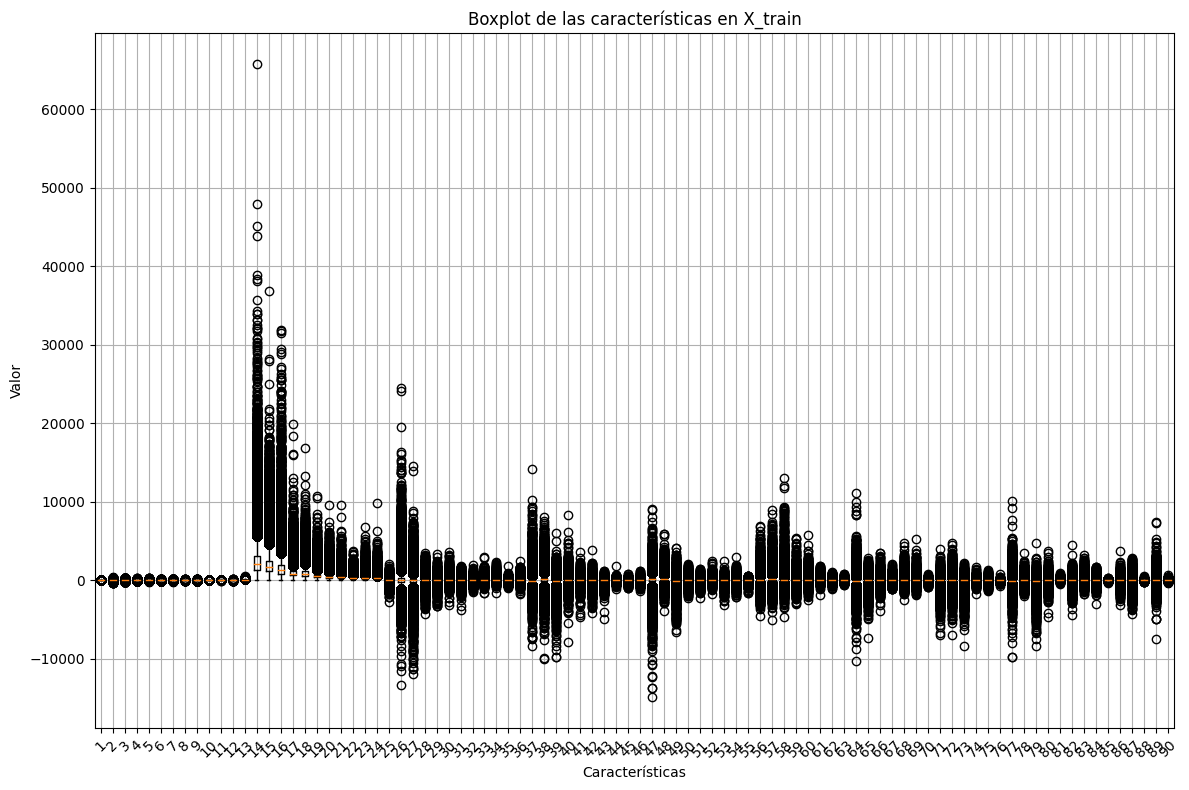

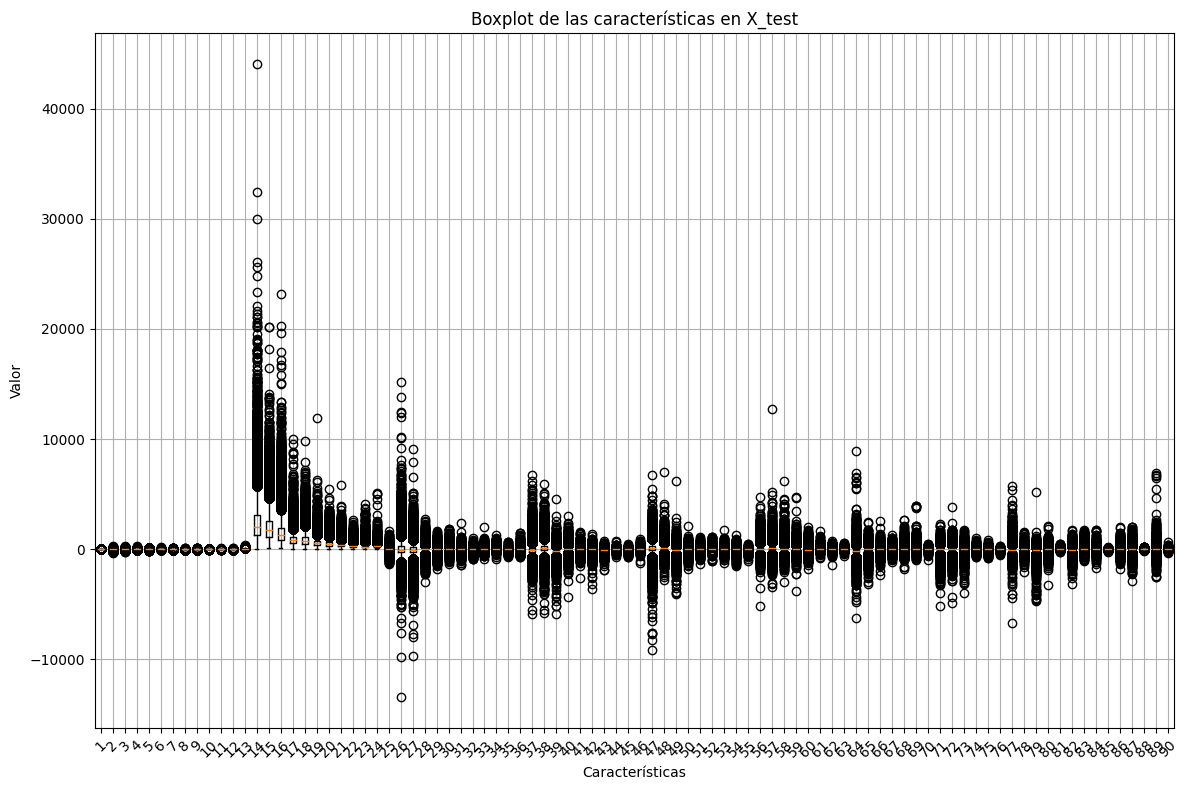

In [41]:
# Boxplot para X_train
plt.figure(figsize=(12, 8))
plt.boxplot(X_train, vert=True)  # Boxplots verticales
plt.title('Boxplot de las características en X_train')
plt.xlabel('Características')  # Cambiado de 'Valor' a 'Características'
plt.ylabel('Valor')  # Cambiado de 'Características' a 'Valor'
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si son nombres
plt.grid(True)  # Añadir una cuadrícula para mejor legibilidad
plt.tight_layout()  # Ajustar automáticamente los parámetros para dar espacio
plt.show()

# Boxplot para X_test
plt.figure(figsize=(12, 8))
plt.boxplot(X_test, vert=True)
plt.title('Boxplot de las características en X_test')  # Corregido el título
plt.xlabel('Características')
plt.ylabel('Valor')
plt.xticks(rotation=45)  # Igualmente rotar las etiquetas aquí si son nombres
plt.grid(True)
plt.tight_layout()
plt.show()

La interpretación que se hace es la misma que en el ejercicio anterior. En general, es clara la existencia de outliers en el conjunto de datos. Basta ver la característica 14, que es la más clara, aunque otras también tienen bastantes valores por encima del tercer cuartil (se salen de los rectángulos en cada característica, que representa el rango desde el primer hasta el tercer cuartil). Este razonamiento es el mismo tanto para entrenamiento como para test.

In [42]:
# X son las características e y las clases, o valor
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
medianas = X_train.median()
IQR = Q3-Q1

low_bound = Q1-1.5*IQR
up_bound = Q3+1.5*IQR

X_train_nueva = X_train.apply(lambda x: np.where((x < low_bound[x.name]) | (x > up_bound[x.name]), medianas[x.name], x), axis=0)

In [43]:
print("X_train sin (en general) outliers")
print(X_train_nueva.describe())

X_train sin (en general) outliers
                  1              2              3              4   \
count  463715.000000  463715.000000  463715.000000  463715.000000   
mean       43.800375       5.323499       9.207223      -0.193861   
std         5.382802      43.808946      29.792637      12.364877   
min        28.143430    -119.598760     -73.216240     -34.423300   
25%        40.405195     -21.596180      -9.493630      -8.176395   
50%        44.262570       8.371550      10.470520      -0.691610   
75%        47.832825      35.930065      28.617495       7.083215   
max        59.579700     129.586400      91.513470      34.664760   

                  5              6              7              8   \
count  463715.000000  463715.000000  463715.000000  463715.000000   
mean       -6.561831     -10.392753      -2.090717      -1.775148   
std        20.278401      11.181510      12.522035       6.755482   
min       -63.216380     -42.535780     -36.714370     -20.507790   

In [44]:
# X son las características e y las clases, o valor
Q1 = X_test.quantile(0.25)
Q3 = X_test.quantile(0.75)
medianas = X_test.median()
IQR = Q3-Q1

low_bound = Q1-1.5*IQR
up_bound = Q3+1.5*IQR

X_test_nueva = X_test.apply(lambda x: np.where((x < low_bound[x.name]) | (x > up_bound[x.name]), medianas[x.name], x), axis=0)

In [45]:
print("X_test sin (en general) outliers")
print(X_test_nueva.describe())

X_test sin (en general) outliers
                 1             2             3             4             5   \
count  51630.000000  51630.000000  51630.000000  51630.000000  51630.000000   
mean      43.752341      5.994207      9.310118      0.153869     -6.727505   
std        5.381964     43.157351     29.864770     12.434752     20.574667   
min       28.070690   -116.884410    -73.897120    -34.161010    -63.847110   
25%       40.317995    -19.984995     -9.713355     -7.937352    -20.178925   
50%       44.229145      8.890255     10.548425     -0.319695     -6.123600   
75%       47.836298     35.787488     28.909380      7.457170      7.239250   
max       59.282820    127.699360     92.147320     35.049370     50.552540   

                 6             7             8             9             10  \
count  51630.000000  51630.000000  51630.000000  51630.000000  51630.000000   
mean     -10.145821     -2.189908     -1.764563      3.951512      1.956496   
std       11.17452

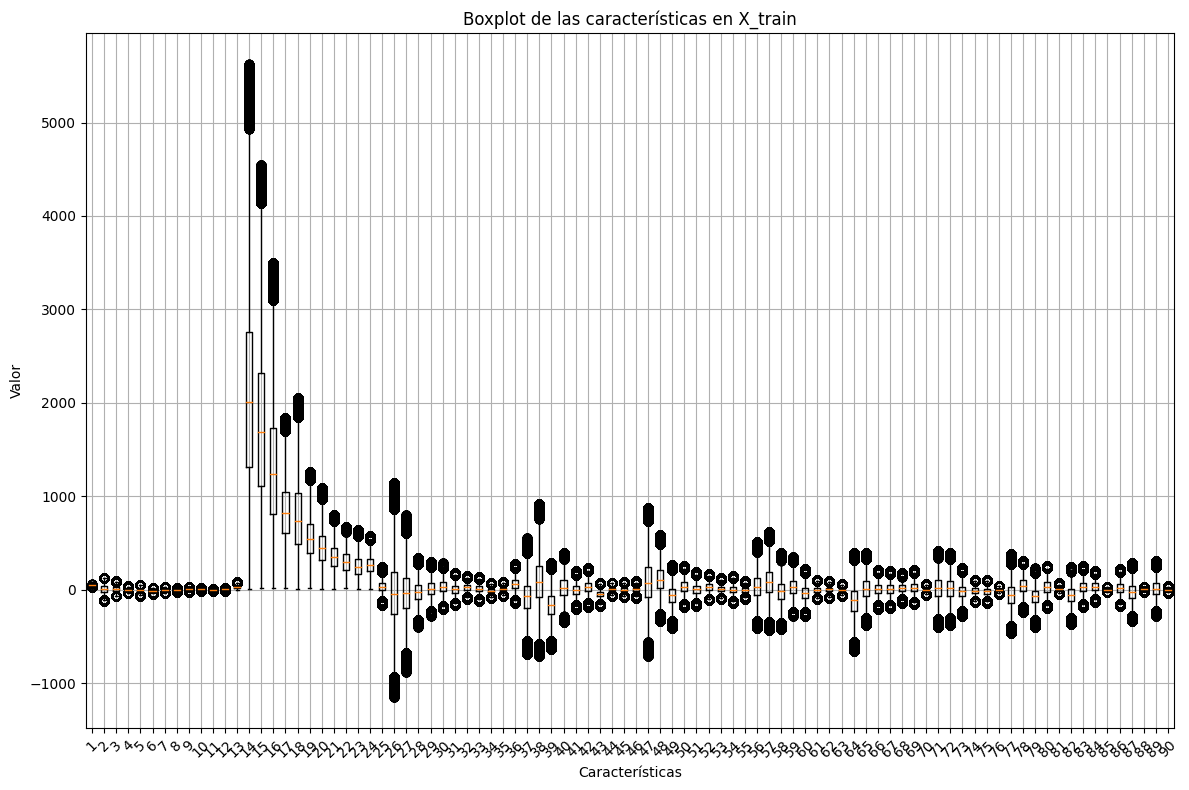

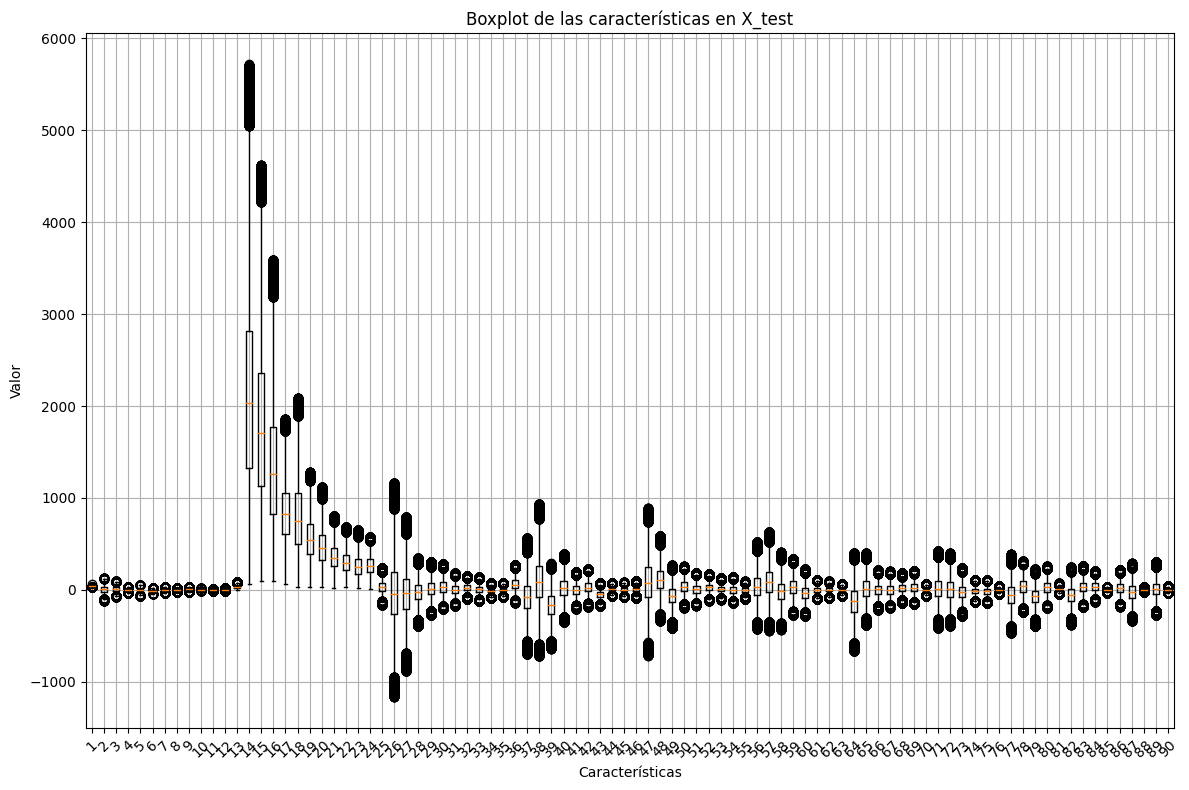

In [46]:
# Boxplot para X_train
plt.figure(figsize=(12, 8))
plt.boxplot(X_train_nueva, vert=True)  # Boxplots verticales
plt.title('Boxplot de las características en X_train')
plt.xlabel('Características')  # Cambiado de 'Valor' a 'Características'
plt.ylabel('Valor')  # Cambiado de 'Características' a 'Valor'
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si son nombres
plt.grid(True)  # Añadir una cuadrícula para mejor legibilidad
plt.tight_layout()  # Ajustar automáticamente los parámetros para dar espacio
plt.show()

# Boxplot para X_test
plt.figure(figsize=(12, 8))
plt.boxplot(X_test_nueva, vert=True)
plt.title('Boxplot de las características en X_test')  # Corregido el título
plt.xlabel('Características')
plt.ylabel('Valor')
plt.xticks(rotation=45)  # Igualmente rotar las etiquetas aquí si son nombres
plt.grid(True)
plt.tight_layout()
plt.show()

Los estadísticos han cambiado bastante con el cambio realizado. Basta observar la característica 90, que en relación a la situación anterior, la distancia del cuartil 3 con respecto a la media, o el máximo con respecto al cuartil 3, es mucho menor. Gráficamente, se puede observar en los boxplots que, aunque hay algunos valores por encima del tercer cuartil, la distribución de los valores por característica está ya bastante más centrada (obsérvese que muchos rectángulos ya pueden verse, siendo antes apenas visibles). Se considera entonces que se han tratado los outliers del problema.

In [47]:
X_train = X_train_nueva
X_test = X_test_nueva

Se hace una estandarización de los datos a media nula y desviación típica uno (es decir, si $x$ es un valor, se haría $\frac{x-\mu}{\sigma}$, donde $\mu$ es la media de valores de esas características y $\sigma$ la desviación típica con respecto a la media mencionada) para usar los datos en algoritmos como SVM.



In [48]:
scal_0_1 = MinMaxScaler()

# Normalizar a [0,1]
X_train_0_1 = scal_0_1.fit_transform(X_train)

# Se muestran los estadísticos y se discute la presencia de outliers
df_X_train_0_1 = pd.DataFrame(X_train_0_1,columns=X_train.columns)

# Normalizar a [0,1]
X_test_0_1 = scal_0_1.fit_transform(X_test)

# Se muestran los estadísticos y se discute la presencia de outliers
df_X_test_0_1 = pd.DataFrame(X_test_0_1,columns=X_test.columns)

print("X_train normalizado a [0,1]")
print(df_X_train_0_1.describe())
print("X_test normalizado a [0,1]")
print(df_X_test_0_1.describe())

X_train normalizado a [0,1]
                  1              2              3              4   \
count  463715.000000  463715.000000  463715.000000  463715.000000   
mean        0.498054       0.501323       0.500356       0.495447   
std         0.171229       0.175809       0.180858       0.178973   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.390052       0.393292       0.386831       0.379905   
50%         0.512756       0.513555       0.508025       0.488242   
75%         0.626327       0.624150       0.618187       0.600777   
max         1.000000       1.000000       1.000000       1.000000   

                  5              6              7              8   \
count  463715.000000  463715.000000  463715.000000  463715.000000   
mean        0.498960       0.500826       0.500580       0.500042   
std         0.178593       0.174221       0.181041       0.180328   
min         0.000000       0.000000       0.000000       0.000000   
25%  

Todos los datos se ven que han sido normalizados a [0,1] (por los campos `min` y `max`).

In [49]:
scaler = StandardScaler()

#Normalizaciones correspondientes
X_train_scaled = scaler.fit_transform(df_X_train_0_1)
X_test_scaled = scaler.fit_transform(df_X_test_0_1)

# Convertir a dataframes de pandas
df_X_train_scaled = pd.DataFrame(X_train_scaled,columns=df_X_train_0_1.columns)
df_X_test_scaled = pd.DataFrame(X_test_scaled,columns=df_X_test_0_1.columns)

print("X_train escalado")
print(df_X_train_scaled.describe())
print("X_test escalado")
print(df_X_test_scaled.describe())

X_train escalado
                 1             2             3             4             5   \
count  4.637150e+05  4.637150e+05  4.637150e+05  4.637150e+05  4.637150e+05   
mean  -1.181084e-15 -1.711867e-16  1.115257e-15 -8.053987e-16 -4.218682e-16   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -2.908701e+00 -2.851527e+00 -2.766575e+00 -2.768283e+00 -2.793840e+00   
25%   -6.307465e-01 -6.144797e-01 -6.277012e-01 -6.455820e-01 -6.590872e-01   
50%    8.586523e-02  6.957606e-02  4.240306e-02 -4.025512e-02  2.806393e-02   
75%    7.491366e-01  6.986381e-01  6.515131e-01  5.885286e-01  6.747495e-01   
max    2.931436e+00  2.836476e+00  2.762640e+00  2.819167e+00  2.805490e+00   

                 6             7             8             9             10  \
count  4.637150e+05  4.637150e+05  4.637150e+05  4.637150e+05  4.637150e+05   
mean  -9.622739e-18 -3.659092e-17  1.117341e-16  7.912098e-16  2.524283e-16   
std    1.000001e+00  1.000001e+00 

Salvo aproximaciones en el cálculo, se observa que todos los datos han sido correctamente estandarizados a media nula y desviación típica uno. Nótese que los valores maxímos y mínimos por característica han cambiado. Sin embargo, son relativamente iguales, que es lo importante, por lo que no hay problema al aplicar ciertos modelos.

Se está en condiciones de aplicar métodos de reducción de dimensionalidad. Esto es importante debido a la gran cantidad de muestras presentes y la cantidad de características que hay en el problema. Se empieza aplicando análisis de componentes principales.

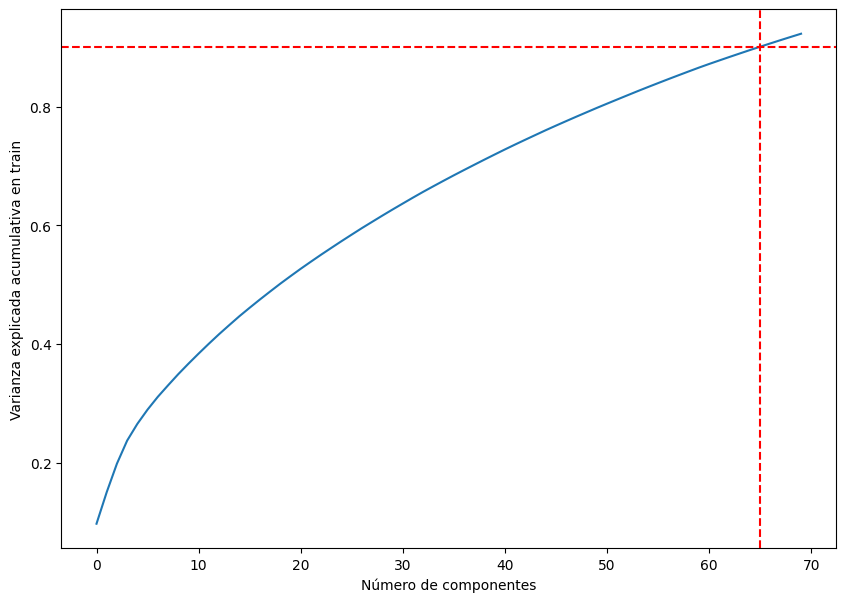

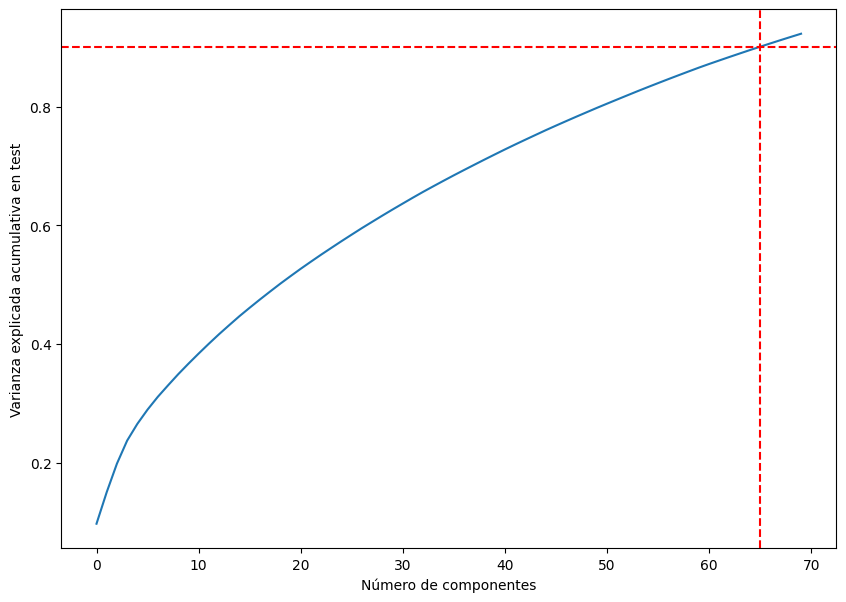

Se han reducido a 66 características.
X_train tras hacer PCA
                 0             1             2             3             4   \
count  4.637150e+05  4.637150e+05  4.637150e+05  4.637150e+05  4.637150e+05   
mean   1.262601e-17 -2.745852e-17  1.078727e-17  7.722708e-18 -9.929196e-18   
std    2.953610e+00  2.200056e+00  2.064932e+00  1.868123e+00  1.602732e+00   
min   -7.760053e+00 -7.619460e+00 -8.354880e+00 -7.139720e+00 -7.168330e+00   
25%   -2.301426e+00 -1.507566e+00 -1.384620e+00 -1.282104e+00 -1.053937e+00   
50%   -1.819246e-02 -1.163565e-01  7.332619e-02 -1.437464e-01 -4.188660e-02   
75%    2.263151e+00  1.415774e+00  1.412224e+00  1.195568e+00  9.784096e-01   
max    9.305197e+00  8.897982e+00  8.393540e+00  8.133007e+00  8.877219e+00   

                 5             6             7             8             9   \
count  4.637150e+05  4.637150e+05  4.637150e+05  4.637150e+05  4.637150e+05   
mean  -2.555848e-17 -6.251716e-18  9.101763e-18  1.225827e-18  2.6631

In [50]:
pca = PCA(n_components=70)

# Aplicar PCA a ambos conjuntos
X_train_pca = pca.fit_transform(df_X_train_scaled)
X_test_pca = pca.fit_transform(df_X_test_scaled)

# Gráfica de la varianza explicada acumulativa en entrenamiento, marcando el 90%
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulativa en train')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.axvline(x=np.where(np.cumsum(pca.explained_variance_ratio_) > 0.9)[0][0], color='r', linestyle='--')
plt.show()

# Gráfica de la varianza explicada acumulativa en test, marcando el 90%
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulativa en test')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.axvline(x=np.where(np.cumsum(pca.explained_variance_ratio_) > 0.9)[0][0], color='r', linestyle='--')
plt.show()

# Determinar el número de componentes para el 90% de varianza explicada
n_comp = np.where(np.cumsum(pca.explained_variance_ratio_) > 0.9)[0][0] + 1

# Ejecutar PCA con el número de componentes necesario para el 90% de varianza explicada
pca = PCA(n_components=n_comp)
X_train_pca = pca.fit_transform(df_X_train_scaled)
X_test_pca = pca.fit_transform(df_X_test_scaled)

print(f"Se han reducido a {n_comp} características.")

df_X_train_pca = pd.DataFrame(X_train_pca)
df_X_test_pca = pd.DataFrame(X_test_pca)

print("X_train tras hacer PCA")
print(df_X_train_pca.describe())
print("X_test tras hacer PCA")
print(df_X_test_pca.describe())

Primero, se hace una reducción a 66 características, dejando en el conjunto de características aquellas con más de un 90% de variabilidad, como se hace en muchos problemas de reducción de dimensiones con ACP.

Interpretando las gráficas, sería necesario mantener 66 características aproximadamente para mantener el 90% de variabilidad en el conjunto de datos. Esto se ve que es cierto por el mensaje más adelante mostrado. Que la varianza acumulada tenga la misma función en ambos conjuntos se debe a que, aunque las muestras son distintas, la relación entre características es la misma, que es en lo que trabaja ACP. Por lo tanto, es natural que elimine las mismas características aunque sean conjuntos diferentes.

Para acabar la parte de preprocesado, recuérdese que las clases en el problema siguen una distribución muy desbalanceada (a partir de 1990 aproximadamente empieza a elevarse de forma considerable el número de canciones publicadas). Por ello, para evitar introducir sesgo en los modelos, se usará *oversampling*, esto es, añadir más muestras para balancear la distribución. Otras técnicas como *undersampling* son usadas, aunque no se considera buena porque lo que hace es eliminar, en este caso, canciones publicadas en los años donde más se publica para balancear con los años en los que menos, pero en este conjunto de datos sería equivalente a balancear con prácticamente cero publicaciones. Con *upsampling* se añaden más muestras en los años con menos muestras (menos canciones publicadas). Se usará la técnica SMOTE para regresión. Además, como es para eliminar sesgo en el modelo, se aplica solo al conjunto de entrenamiento.

SMOTE crea muestras sintéticas para las clases minoritarias (años con menos publicaciones), frente a duplicar muestras existentes (hecho en une técnica de *upsampling* tradicional). El proceso es:

- **Selección de muestras**: Para cada muestra de clase con menos repeticiones, se obtienen sus $K$ vecinos más cercanos, usando la distancia euclídea.

- **Creación de datos sintéticos**: Se escoge uno de los $K$ vecinos aleatoriamente. Una recta que une la muestra y este vecino se genera, y a continuación se usa esta recta para generar los datos sintéticos (se entiende que si una clase es $y$, las nuevas muestras serán de clase $y$ y sus características se encuentran en la recta entre los dos puntos).

Como interpretación personal, el espacio de características es un euclídeo $\mathbb{R}^N$ (por hacer uso de la métrica euclídea, por lo que la norma usada es la inducida en $\mathbb{R}^n$), y si $x$ es la muestra y $x_K$ su vecino elegido, la recta $R = \{z=x + λ(x_K - x): λ \in \mathbb{R} \text{,} \|x\| \leq \|z\| \leq \|x_K\|\}$ es la restricción mostrada en el segundo paso (sin pérdida de generalidad, el razonamiento es análogo si $\|x_K\| \leq \|x\|$), que es un subconjunto compacto. Escoger como datos sintéticos a elementos de $R$ se intuye bueno por la definición de vecino más cercano, y la compacidad ayuda a que la muestra sintética no "escape" de donde podría el modelo predecir como $y$ (sobre todo por ser acotado). En otras palabras, se podría escoger un $ϵ > 0$ tal que se busquen los datos en la bola $B(x,\epsilon)$, y SMOTE escoge $ϵ = \|x-x_K\|$ y los datos de la recta $R$. Se ha llegado a esta conclusión porque, aunque el dato se haya generado de forma sintética, el modelo va a tender a predecir ese datos sintético como el de la clase $y$.

In [51]:
from sklearn.neighbors import NearestNeighbors


def smoter_regression(X, y, k_neighbors=5, oversampling_rate=0.5):
    y = y.to_frame()  # Convierte y en un DataFrame si es una Serie

    # Concatenar X y y para trabajar con el conjunto completo, asegurándose de que y tenga el nombre correcto
    data = pd.concat([X, y], axis=1)

    # Identificación de las muestras según su percentil (discrimina los más bajos)
    q_low = np.percentile(y, 25)
    minority_data = data[data['year'] <= q_low] # Se ve que la menor carga es a la izquierda

    # Aplicar KNN
    nbrs = NearestNeighbors(n_neighbors=k_neighbors+1, algorithm='auto').fit(minority_data.iloc[:, :-1])
    distances, indices = nbrs.kneighbors(minority_data.iloc[:, :-1])

    # Interpolación
    new_samples = []
    num_new_samples = int(len(minority_data) * oversampling_rate)

    for _ in range(num_new_samples):
        idx = np.random.randint(0, len(minority_data))
        neighbor_idx = np.random.choice(indices[idx][1:])  # Excluir el propio punto
        new_point = (minority_data.iloc[idx, :-1].values + minority_data.iloc[neighbor_idx, :-1].values) / 2
        new_target = (minority_data.iloc[idx, -1] + minority_data.iloc[neighbor_idx, -1]) / 2
        new_sample = np.append(new_point, new_target)
        new_samples.append(new_sample)

    # Crear DataFrame de los nuevos puntos
    new_samples_df = pd.DataFrame(new_samples, columns=data.columns)
    new_data = pd.concat([data, new_samples_df], ignore_index=True)

    # Separar en características y variable objetivo nuevamente
    X_resampled = new_data.drop('year', axis=1)
    y_resampled = new_data['year']

    return X_resampled, y_resampled

In [52]:
y_ser_train = pd.Series(y_train,name='year')
y_ser_train

0         2001.0
1         2001.0
2         2001.0
3         2001.0
4         2001.0
           ...  
463710    2008.0
463711    2006.0
463712    2007.0
463713    2006.0
463714    2007.0
Name: year, Length: 463715, dtype: float64

In [53]:
X_train_resampled,y_train_resampled = smoter_regression(df_X_train_pca,y_ser_train)
#X_test_resampled,y_test_resampled = smoter_regression(df_X_test_pca,y_ser_test)

Veamos si han aumentado las muestras.

In [54]:
print("X_train tras SMOTE")
print(X_train_resampled.describe())
print("y_train tras SMOTE")
print(y_train_resampled.describe())

X_train tras SMOTE
                  0              1              2              3   \
count  522473.000000  522473.000000  522473.000000  522473.000000   
mean       -0.031796       0.022033       0.041442      -0.041551   
std         2.925529       2.171201       2.050414       1.837471   
min        -7.760053      -7.619460      -8.354880      -7.139720   
25%        -2.299715      -1.457203      -1.325280      -1.298539   
50%        -0.055356      -0.086793       0.116766      -0.186149   
75%         2.195645       1.411912       1.437504       1.121991   
max         9.305197       8.897982       8.393540       8.133007   

                  4              5              6              7   \
count  522473.000000  522473.000000  522473.000000  522473.000000   
mean        0.028719       0.062187       0.015446       0.011846   
std         1.585987       1.450685       1.373364       1.303465   
min        -7.168330      -7.104705      -6.746557      -6.524293   
25%        -1.

Se ha hecho *oversampling* con éxito. El número de muestras ha aumentado con respecto al conjunto inicial. Además, se ha conseguido reducir los estadísticos como el año medio o aumentar otros como el primer cuartil (tal y como se ve a continuación), indicando que las muestras que se encontraban, en término de frecuencia, debajo del 25%, han aumentado en cuanto a repeticiones.

In [55]:
print("y_train antes de SMOTE")
print(y_train.describe())

y_train antes de SMOTE
count    463715.000000
mean       1998.386095
std          10.939767
min        1922.000000
25%        1994.000000
50%        2002.000000
75%        2006.000000
max        2011.000000
Name: 0, dtype: float64


El histograma para las repeticiones tras *oversampling* es:

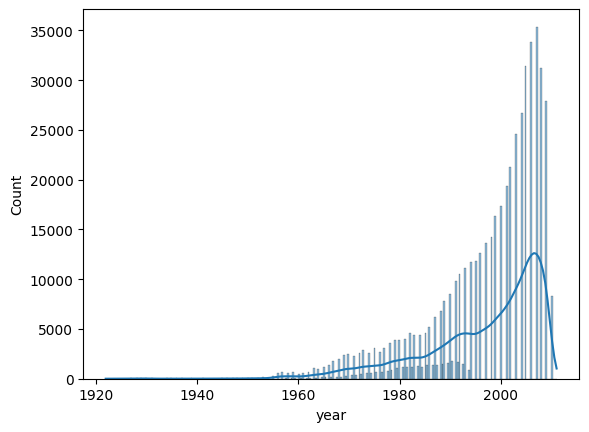

In [56]:
sns.histplot(y_train_resampled,kde=True)  # Según el año
plt.show()

Hecho el preprocesamiento en ambos conjuntos, se procede a la elección de los modelos a entrenar y su validación. Al igual que en el ejercicio 2, para cross-validation se usará la función `KFold`, especialmente útil para casos en que la distribución de los datos esté desbalanceada, pues aunque se ha conseguido balancear algo más la distribución, sería buena práctica usarla (sobre todo tras observar el nuevo histograma). Los argumentos de la función `KFold` que, a diferencia de `StratifiedKFold` que es para variables c, es para regresión, son:

- `n_splits`: Número de divisiones que se harán en el conjunto de datos.

- `shuffle`: Si está a `True`, los datos se barajan antes de dividirse. Si están ordenados por clase es especialmente útil, ya que podría afectar al aprendizaje.

- `random_state`: Solo útil si `shuffle=True`, es la semilla que hace que el orden sea pseudoaleatorio.

- `split`: Método generador de las divisiones si fuese necesario dividir de una manera distinta a la por defecto de la función.

Se usan solo los tres primeros argumentos.


In [57]:
#from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

def modelValidation(modelo,X_train,y_train,X_test,y_test):
  # Definición del método de cross-validation
    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    # Calculamos los scores de la validación cruzada usando MSE
    cv_scores = cross_val_score(modelo, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    print(f"CV MSE scores: {cv_scores}")
    print(f"MSE del CV media: {-np.mean(cv_scores)}")  # Negativo porque scikit-learn devuelve negativo el MSE
    print(f"Varianza del CV: {np.var(cv_scores)}")

    # Entrenamiento y predicción
    modelo.fit(X_train, y_train)
    predictions = modelo.predict(X_test)

    # Evaluación del modelo
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print("MSE - Test:", mse)
    print("MAE - Test:", mae)
    print("R^2 - Test:", r2)

Las métricas usadas para la validación del modelo son:

- MSE del CV medio: Media de los MSE scores en el cross-validation.

- Varianza del CV: Mide la estabilidad del modelo. Cunato más baja, más estable será (esto es, no varía el rendimiento entre las divisiones del cross-validation).

- MSE - Test: Si es mayor que el MSE del CV medio, indica o sobreajuste o que los datos de test son más difíciles de predecir.

- MAE - Test: Errores en las predicciones de test con respecto la variable objetivo. Es el error sin considerar la dirección de este (a sobreajustar o infraentrenar).

- R$^2$ - Test: Correlación entre los datos. Está entre -1 y 1, en función del comportamiento creciente o decreciente del modelo. Cuanto más bajo sea, más pobre es el modelo y peor relaciona los datos.

Los modelos escogidos se deben a que, debido a la gran cantidad de datos con los que entrenar, los más potentes como redes neuronales o SVM tardan mucho, expulsando la ejecución de la sesión de trabajo. Por ello, se escogen otros más simples que pueden no modelar de manera satisfactoria la relación entre los datos. En otras situaciones se estima que modelos más potentes serían una mejor solución, ya que la relación entre características es bastante compleja. Tampoco se usará `GridSearchCV` ni `RandomSearchCV` debido a que tarda mucho en encontrar el mejor hiperparámetro.

In [70]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
#from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV # estos se usarán para stacking
#from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

**Regresión lineal**

No es necesario pasar hiperparámetros para evaluar el rendimiento, ya que no afectan a las métricas en gran medida. En un caso real, se podría probar a modelar los datos por este modelo, que es de los más simples, aunque no captura relaciones complejas, por lo que no se esperan resultados muy buenos (en comparación a los del ejercicio 2).

In [68]:
mod = LinearRegression()
modelValidation(mod,X_train_resampled,y_train_resampled,df_X_test_pca,y_test)


CV MSE scores: [-110.46210478 -111.20686392 -110.82831404 -111.0832691  -110.26834075]
MSE del CV media: 110.76977851864494
Varianza del CV: 0.12776987282670604
MSE - Test: 151.79486973784847
MAE - Test: 9.571365227545286
R^2 - Test: -0.28897573423794887


El error medio de cross-validation es bastante alto y, aunque la varianza media sea baja, como esta evalua la variabilidad entre divisiones, como en cada división da errores muy altos, no da información relevante.

En MSE test se observa un error incluso más alto que en entrenamiento, indicando la presencia de sobreajuste o que el modelo no es bueno captando relaciones entre los datos. Debido a la gran cantidad de datos, y el uso de un modelo de regresión lineal, se opta por la justificación de que el modelo no modeliza correctamente las relaciones entre datos. Se proponen otros métodos más potentes como redes neuronales artificiales, SVM o random forest. Sin embargo, como hay muchos datos, y habría que experimentar con varios hiperparámetros para ver qué modelo da mejores resultados, se necesitaría un entorno con bastantes más recursos.

**Random Forest**

Tras varios intentos de ejecutar un modelo de random forest, se escoge hacerlo solo para 5 árboles, que tarda en media 40 minutos, para realizar el ejercicio. Sin embargo, se estima que más árboles podrían dar mejores resultados.

In [58]:
n_estims = [50,100,200,300,400,500]

rf = RandomForestRegressor(n_estimators=5,random_state=42)
param_distr = {
    'n_estimators': n_estims
}
# Configuración del grid

#random_search = RandomizedSearchCV(
#    estimator = rf,
#    param_distributions = param_distr,
#    n_iter=10,
#    cv=5,
#    scoring='neg_mean_squared_error',
#    n_jobs=-1,
#    random_state=42
#)

modelValidation(rf,X_train_resampled,y_train_resampled,df_X_test_pca,y_test)

#mejor_n_est = random_search.best_estimator_.get_params()['n_estimators']
#print(f'El mejor valor para el número de árboles es {mejor_n_est}')

CV MSE scores: [-122.24703144 -124.40185368 -123.3963221  -121.93416235 -121.7474745 ]
MSE del CV media: 122.7453688129111
Varianza del CV: 1.0139742824311229
MSE - Test: 170.1393114468332
MAE - Test: 10.049008328491187
R^2 - Test: -0.4447487209130583


Como conclusión de las métricas, el modelo muestra un desempeño deficiente en general, con altos errores medios tanto en cross-validation en entrnamiento como en test. Además, el valor de la varianza media en cross-validation indica que hay una variabilidad moderada en el desempeño del modelo a través de las diferentes divisiones en cross-validation. Sin embargo, parece ser algo menos consistente que la regresión lineal.

Aunque pueda parecer que explica mejor la variabilidad de los datos, el hecho de que $R^2$ sea negativo implica que el modelo es peor que un modelo simple basado en la media de los valores observados. Por lo tanto, es inadecuado usar random forest para modelar  los datos.

**Regresión Ridge**


Se introduce un nuevo modelo para regresión, el modelo *Ridge*, aunque se opta por usar aquella implementación que incluye cross-validation. En general, se toma la siguiente función coste

$$L(\beta) = \sum_{i=1}^n (y_i -X_i \beta)^2 + \alpha \|\beta\|^2$$

donde $y_i$ es la clase de la muestra $i-ésima$, $X_i$ su vector de características, $\beta$ los coeficientes del modelo y $\alpha$ el parámetro de regularización. Debido a que este último puede hacer variar el rendimiento del modelo, se hace variable y se obtiene el mejor de una selección. A mayor valor, el modelo puede tender a infraentrenarse pues el modelo no capta bien la variabilidad de los datos, y a menor valor, no se diferenciará de la regresión lineal y tenderá a sobreajustarse.

In [74]:
ridcv = RidgeCV(alphas=[0.1,1.0,10.0,100.0],cv=5)
modelValidation(ridcv,X_train_resampled,y_train_resampled,df_X_test_pca,y_test)

print("El mejor alpha ha sido: ",ridcv.alpha_)

CV MSE scores: [-110.46207918 -111.20696642 -110.82826557 -111.08321723 -110.26830822]
MSE del CV media: 110.76976732390347
Varianza del CV: 0.12778983334351518
MSE - Test: 151.78822061259135
MAE - Test: 9.571169193344161
R^2 - Test: -0.2889192727704093
El mejor alpha ha sido:  100.0


A grandes rasgos, el modelo tiene problemas significativos tanto en términos del error absoluto como de su capacidad para explicar la variablidad de los datos. Los altos errores de MSE y MAE, junto a un $R^2$ negativo, sugiere que el modelo es ineficaz en el conjunto de datos. Sería recomendable usar otro modelo más robusto o que relacione mejor los datos.

Por métrica, la media de los MSE del cross-validation es bastante alto, indicando que el cuadrado del error entre predicciones del modelo y los valores reales es alto, por lo que el error en predcciones es bastante elevado.

Por otro lado, la baja varianza media del cross-validation indica que el modelo es relativamente consistente a través de las divisiones del conjunto. Aunque podría parecer positivo, el error medio es muy alto, por lo que para este modelo no es un buen valor.

El MSE en test también tiene un valor bastante elevado. Además, el MAE en test indica también errores en la predicción del modelo.

Respecto a que el mejor hiperparámetro de regularización sea $100$ se debe a que podría ser que el modelo, intentando minimizar la varianza, se introduzca sesgo. Además, por ser alto el valor, los coeficientes del modelo se hacen más pequeños, tendiendo a que el modelo no sobreajuste. Por otro lado, el alto valor de $\alpha$ puede indicar que el modelo está suprimiendo muchas características, aunque al habiendo hecho reducción de características en el preprocesado, posiblemente no sea el motivo de la elección de $\alpha$.

**Stacking**

Para evitar un gran tiempo de ejecución, se usan modelos relativamente simples. Serían:

- Modelos base: Ridge y Lasso.

- Metamodelo: Regresión lineal.

El algoritmo Lasso usado incluye cross-validation. Incluye regularización $L_1$, y la función coste es similar a la de Ridge, aunque la norma usada es la $L_1$, no la $L_2$.

In [72]:
modelos_base = [
   ('ridge',RidgeCV()),
   ('lasso',LassoCV(random_state=42))
]

metamodelo = LinearRegression() #RandomForestRegressor(n_estimators=100,random_state=42)

# Creación del modelo stacking
stacking_reg = StackingRegressor(estimators=modelos_base,final_estimator=metamodelo,cv=5)

modelValidation(stacking_reg,X_train,y_train,X_test,y_test)

CV MSE scores: [-93.95439389 -94.14187818 -94.82244047 -94.7960552  -93.77627214]
MSE del CV media: 94.29820797630511
Varianza del CV: 0.18754714326486993
MSE - Test: 93.84015935580675
MAE - Test: 6.970600880881945
R^2 - Test: 0.20315035339763154


Se inicializa la semilla para el modelo Lasso a 42, dejando el resto los hiperparámetros por defecto. La elección de Ridge y Lasso para los modelos base es para poder complementar las formas de regularización con dos normas distintas, pudiendo obtener mejores resultados.

Con respecto a las métricas, el modelo tiene un rendimiento consistente tanto en el cross-validation como en los datos de test, en términos de la métrica MSE. Sin embargo, el coeficiente de explicabilidad, $R^2$, es bastante bajo, por lo que el modelo no explica gran parte de la variabilidad de los datos. Esto da que pensar en que sería buena idea incluir modelos más potentes al stacking. Por ello, se añade un random forest de 5 árboles como metamodelo para complementar la salida de los modelos base, para observar si juntando modelos, en general, malos para este conjunto de datos, mejora la situación.

In [73]:
modelos_base = [
   ('ridge',RidgeCV()),
   ('lasso',LassoCV(random_state=42))
]

metamodelo = RandomForestRegressor(n_estimators=5,random_state=42)

# Creación del modelo stacking
stacking_reg = StackingRegressor(estimators=modelos_base,final_estimator=metamodelo,cv=5)

modelValidation(stacking_reg,X_train,y_train,X_test,y_test)

CV MSE scores: [-122.35234016 -122.69460509 -123.32682215 -123.44749651 -122.17340717]
MSE del CV media: 122.79893421616603
Varianza del CV: 0.260182723834839
MSE - Test: 122.13444414687093
MAE - Test: 7.877252483329185
R^2 - Test: -0.03711235492897269


Al igual que que en los otros modelos, el error medio dado por cross-validation es bastante alto. Al igual que en otros modelos, aunque la varianza es baja, dado el alto valor del error medio, no da información más allá de que es consistente entre divisiones del cross-validation (pensando en que de por sí predice bastante mal).

Mismo comentario que para MSE del test y MAE en el test. Debido a los altos valores, el modelo no es bueno prediciendo. Sin embargo, el MSE en test es algo menor que el MSE medio en cross-validation.

La métrica $R^2$ es bastante cercano a 0, por lo que se muestra la limitada capacidad de explicar la variabilidad de los datos en el conjunto.

**Conclusiones**

Tras haber experimentado con varios modelos simples debido a la gran cantidad de datos y la limitación de recursos, se han obtenido modelos que no son buenos para hacer predicciones sobre el año de publicación de canciones. Debido a los valores de error, se intuye que predice muy mal, aunque por el valor de la varianza media en cross-validation se intuye que los modelos usados son bastante simples, no pueden capturar bien las relaciones entre los datos. Por lo tanto, en presencia de mayor cantidad de recursos (tales como GPU), se propone entrenar y validar modelos más potentes como redes neuronales, SVM u otros modelos, variando sus hiperparámetros para obtener el mejor modelo.

En el caso de los modelos entrenados, teniendo en cuenta que no son buenos predictores, se escogería, en función de:

- MSE: El primer modelo stacking, que incluye regresión lineal como metamodelo, presenta menor valor de error medio.

- MAE: El primer modelo stacking presenta menor valor, sugiriendo que las predicciones de este modelo tienen error absoluto medio menor que el resto.

- $R^2$: El primer modelo stacking también tiene mejor valor de este coeficiente, pues es el único positivo. Sin embargo, al no ser muy cercano a 1, no explica bien la variabilidad de los datos.

En resumen, aunque los modelos entrenados son malos, se escogería el modelo stacking con modelos base los modelos Ridge y Lasso y metamodelo la regresión lineal como mejor modelo en comparación al resto.